In [211]:
import pandas as pd
import numpy as np

file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/Account Products.xlsx'
df = pd.read_excel(file_path, sheet_name='ranking_position', skiprows=7)

display(df.head())

Unnamed: 0  \
0  Best Comission-Free Accounts (Helmycash)   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

                                   date  2021-12-01 00:00:00  \
0     Cuenta Online sin comisiones BBVA                  1.0   
1                    Cuenta Nómina ING                   2.0   
2  Cuenta Nómina hasta 5% TAE Bankinter                  3.0   
3                   Cuenta Clara ABANCA                  4.0   
4           Cuenta Online SIN Liberbank                  5.0   

   2022-01-01 00:00:00  2022-02-01 00:00:00  2022-03-01 00:00:00  \
0                  1.0                  1.0                  NaN   
1                  2.0                  2.0                  NaN   
2                  3.0                  3.0                  NaN   
3                  4.0                  4.0                  NaN   
4                  5.0                  5.0                  NaN   

   2022-04-01 00:00:00  2022-05-01 00:00:00  2022-06-01 00:00:00  \
0                  NaN                  1.0                  8.0   
1                  NaN                  2.0                  1.0   
2                  NaN                  3.0                  2.0   
3                  NaN                  4.0                  6.0   
4                  NaN                  8.0                  NaN   

   2022-07-01 00:00:00  2022-08-01 00:00:00  2022-09-01 00:00:00  \
0                  3.0                  3.0                  3.0   
1                  1.0                  1.0                  1.0   
2                  2.0                  7.0                  5.0   
3                  6.0                  5.0                  6.0   
4                  NaN                  NaN                  NaN   

   2022-10-01 00:00:00  2022-11-01 00:00:00  2022-12-01 00:00:00  \
0                  NaN                  3.0                  3.0   
1                  NaN                  2.0                  6.0   
2                  NaN                  NaN                  NaN   
3                  NaN                  4.0                  5.0   
4                  NaN                  NaN                  NaN   

   2023-01-01 00:00:00  2023-02-01 00:00:00  2023-03-01 00:00:00  \
0                  5.0                  5.0                  6.0   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  4.0                  4.0                  4.0   
4                  NaN                  NaN                  NaN   

   2023-04-01 00:00:00  2023-05-01 00:00:00  2023-06-01 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2023-07-01 00:00:00  2023-08-01 00:00:00  2023-09-01 00:00:00  \
0                  4.0                  6.0                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  4.0                  NaN   
4                  NaN                  NaN                  NaN   

   2023-10-01 00:00:00  2023-11-01 00:00:00  2023-12-01 00:00:00  \
0                  NaN             4.176471             3.193548   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN             5.470588             5.354839   
4                  NaN                  NaN                  NaN   

   2024-01-01 00:00:00  
0             4.035714  
1                  NaN  
2                 

In [212]:
df['Unnamed: 0'] = df['Unnamed: 0'].fillna(method='ffill')

# Rename the columns for clarity:
df.columns = ['Category', 'Bank Name'] + list(df.columns[2:])

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_21228\2703216551.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Unnamed: 0'] = df['Unnamed: 0'].fillna(method='ffill')


In [213]:
transformed_df = pd.melt(df, id_vars=['Category', 'Bank Name'], var_name='Date', value_name='Rank')
transformed_df['Date'] = pd.to_datetime(transformed_df['Date'])
print(transformed_df.head())

                                   Category  \
0  Best Comission-Free Accounts (Helmycash)   
1  Best Comission-Free Accounts (Helmycash)   
2  Best Comission-Free Accounts (Helmycash)   
3  Best Comission-Free Accounts (Helmycash)   
4  Best Comission-Free Accounts (Helmycash)   

                              Bank Name       Date  Rank  
0     Cuenta Online sin comisiones BBVA 2021-12-01   1.0  
1                    Cuenta Nómina ING  2021-12-01   2.0  
2  Cuenta Nómina hasta 5% TAE Bankinter 2021-12-01   3.0  
3                   Cuenta Clara ABANCA 2021-12-01   4.0  
4           Cuenta Online SIN Liberbank 2021-12-01   5.0  


In [214]:
'''
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

# Convert date to a numerical format if not already done
transformed_df['Date'] = pd.to_datetime(transformed_df['Date']).astype(np.int64)

# Ensure that 'Category' and 'Bank Name' are not included if they are non-numeric without encoding
# For simplicity here, we only use numeric columns (assuming Date has been transformed to numeric)
df_for_imputation = transformed_df[['Date', 'Rank']]

# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the data
df_for_imputation['Rank'] = imputer.fit_transform(df_for_imputation)

# Merge or replace the original 'Rank' column
transformed_df['Rank'] = df_for_imputation['Rank']

# Check for any remaining missing values
print(transformed_df.isnull().sum())

'''

"\nfrom sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\nimport numpy as np\n\n# Convert date to a numerical format if not already done\ntransformed_df['Date'] = pd.to_datetime(transformed_df['Date']).astype(np.int64)\n\n# Ensure that 'Category' and 'Bank Name' are not included if they are non-numeric without encoding\n# For simplicity here, we only use numeric columns (assuming Date has been transformed to numeric)\ndf_for_imputation = transformed_df[['Date', 'Rank']]\n\n# Initialize the IterativeImputer\nimputer = IterativeImputer(max_iter=10, random_state=0)\n\n# Fit and transform the data\ndf_for_imputation['Rank'] = imputer.fit_transform(df_for_imputation)\n\n# Merge or replace the original 'Rank' column\ntransformed_df['Rank'] = df_for_imputation['Rank']\n\n# Check for any remaining missing values\nprint(transformed_df.isnull().sum())\n\n"

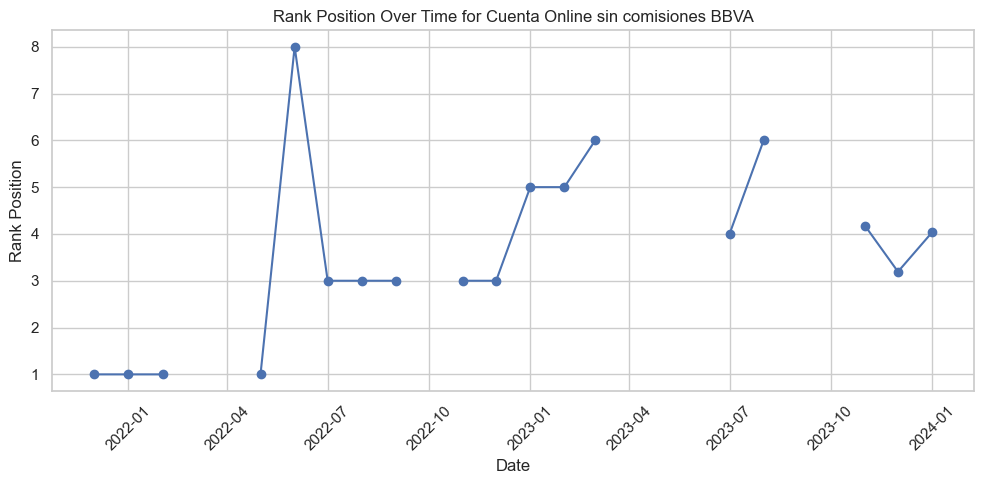

In [215]:
import matplotlib.pyplot as plt

# Example for plotting data for a specific bank and category
bank_data = transformed_df[(transformed_df['Bank Name'] == 'Cuenta Online sin comisiones BBVA') &
                           (transformed_df['Category'] == 'Best Comission-Free Accounts (Helmycash)')]

plt.figure(figsize=(10, 5))
plt.plot(bank_data['Date'], bank_data['Rank'], marker='o', linestyle='-')
plt.title('Rank Position Over Time for Cuenta Online sin comisiones BBVA')
plt.xlabel('Date')
plt.ylabel('Rank Position')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [216]:
summary = transformed_df['Rank'].describe()
print(summary)

count    470.000000
mean       4.937191
std        2.649911
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       11.000000
Name: Rank, dtype: float64


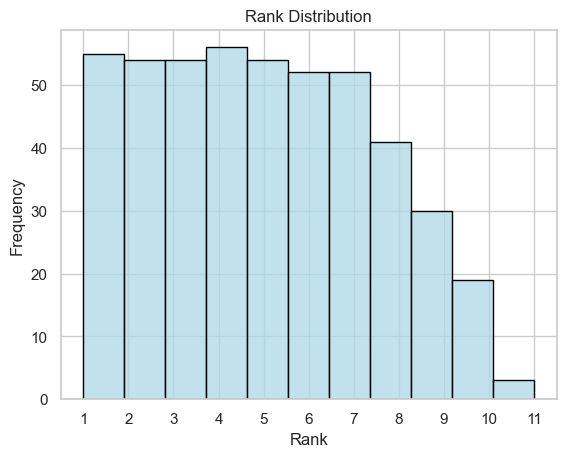

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(transformed_df['Rank'], bins=11, color='lightblue', edgecolor='black', kde=False)
plt.title('Rank Distribution')
plt.xlabel('Rank')
plt.ylabel('Frequency')

# Set the ticks on the x-axis to cover all ranks from 1 to 11
plt.xticks(np.arange(1, 12, step=1))  # This sets ticks at every integer from 1 to 11

plt.show()

### Imputing with 13 value

In [218]:
transformed_df['Rank'] = transformed_df['Rank'].fillna(13)
transformed_df.isna().sum()

Category     0
Bank Name    0
Date         0
Rank         0
dtype: int64

We are able to observed that for rank above 7 is uniform distributed, whereas below rank is decreasing monotically

#### Category

In [219]:
# Extract bank names and categories
bank_names = df.iloc[0:, 1]  # Bank names are in the second column starting from the second row
categories = df.iloc[0:, 0]  # Categories are in the first column for each bank


filled_categories = categories.fillna(method='ffill')

combined_df = pd.DataFrame({
    'Category': filled_categories,
    'Bank Name': bank_names
})

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_21228\3609543098.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_categories = categories.fillna(method='ffill')


In [220]:
value_counts = combined_df['Bank Name'].value_counts()
print(value_counts)

# Descriptive statistics for a categorical column
cat_summary = combined_df['Bank Name'].describe()
print(cat_summary)

Bank Name
Cuenta Nómina hasta 5% TAE Bankinter               3
Cuenta Clara ABANCA                                3
Cuenta Online SIN Liberbank                        2
Cuenta Nómina ING                                  2
Cuenta Inteligente Bienvenida EVO Banco            2
Cuenta Online Sabadell                             2
Cuenta Online sin comisiones BBVA                  1
Cuenta de Ahorro Bank Norwegian                    1
Cuenta de Ahorro Online Nationale Nederlanden      1
Cuenta de Ahorro Progretto                         1
Cuenta Naranja ING                                 1
Cuenta de Ahorro BraBank                           1
Cuenta de Ahorro Lea Bank                          1
Cuenta PlayStation Unicaja Banco                   1
Cuenta Vamos Ibercaja                              1
Cuenta de Ahorro Klarna                            1
Cuenta Ahorro Trade Republic                       1
Cuenta Contigo Renault Bank                        1
Cuenta Día a Día Caixabank          

In [221]:
# List of specific banks
banks_of_interest = [
    'Cuenta Online SIN Liberbank',
    'Cuenta Nómina ING ',
    'Cuenta Inteligente Bienvenida EVO Banco',
    'Cuenta Online Sabadell'
]

# Filtering the DataFrame
filtered_df = combined_df[combined_df['Bank Name'].isin(banks_of_interest)]

# Display unique categories for these banks
for bank in banks_of_interest:
    categories = filtered_df.loc[filtered_df['Bank Name'] == bank, 'Category'].unique()
    print(f"{bank}: {', '.join(categories)}")


Cuenta Online SIN Liberbank: Best Comission-Free Accounts (Helmycash), Best Salary Accounts (Helmycash)
Cuenta Nómina ING : Best Comission-Free Accounts (Helmycash), Best Salary Accounts (Helmycash)
Cuenta Inteligente Bienvenida EVO Banco: Best Comission-Free Accounts (Helmycash), Best Savings Accounts (Helpmycash)
Cuenta Online Sabadell: Best Salary Accounts (Helmycash), Best Savings Accounts (Helpmycash)


In [222]:
file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/Account Products.xlsx'
bank_df = pd.read_excel(file_path, sheet_name='account_products')
bank_df.head()

Unnamed: 0                    account product           bank  \
0           1                         Cuenta N26            N26   
1           2             Cuenta Online Sabadell  Banc Sabadell   
2           3                Cuenta Clara Abanca         ABANCA   
3           4  Cuenta Inteligente Bienvenida Evo      EVO Banco   
4           5                   Cuenta No Cuenta            ING   

        url - bank product information  
0  n26.com/es-es/cuenta-sin-comisiones  
1       bancsabadell.com/cuenta-online  
2  abanca.com/es/cuentas/cuenta-online  
3     evobanco.com/cuenta-inteligente/  
4           ing.es/cuenta-nocuenta-ing

In [223]:
# Convert 'Account Product' in bank_df to lowercase
bank_df['account product'] = bank_df['account product'].str.lower()

# Convert 'Bank Name' in transformed_df to lowercase
transformed_df['Bank Name'] = transformed_df['Bank Name'].str.lower()
merged_df = pd.merge(transformed_df, bank_df, how='left', left_on='Bank Name', right_on='account product')

In [224]:
merged_df.drop(columns=['Unnamed: 0'])

Category  \
0     Best Comission-Free Accounts (Helmycash)   
1     Best Comission-Free Accounts (Helmycash)   
2     Best Comission-Free Accounts (Helmycash)   
3     Best Comission-Free Accounts (Helmycash)   
4     Best Comission-Free Accounts (Helmycash)   
5     Best Comission-Free Accounts (Helmycash)   
6     Best Comission-Free Accounts (Helmycash)   
7     Best Comission-Free Accounts (Helmycash)   
8     Best Comission-Free Accounts (Helmycash)   
9     Best Comission-Free Accounts (Helmycash)   
10    Best Comission-Free Accounts (Helmycash)   
11    Best Comission-Free Accounts (Helmycash)   
12    Best Comission-Free Accounts (Helmycash)   
13            Best Salary Accounts (Helmycash)   
14            Best Salary Accounts (Helmycash)   
15            Best Salary Accounts (Helmycash)   
16            Best Salary Accounts (Helmycash)   
17            Best Salary Accounts (Helmycash)   
18            Best Salary Accounts (Helmycash)   
19            Best Salary Accounts (Helmycash)   
20            Best Salary Accounts (Helmycash)   
21            Best Salary Accounts (Helmycash)   
22            Best Salary Accounts (Helmycash)   
23            Best Salary Accounts (Helmycash)   
24            Best Salary Accounts (Helmycash)   
25          Best Savings Accounts (Helpmycash)   
26          Best Savings Accounts (Helpmycash)   
27          Best Savings Accounts (Helpmycash)   
28          Best Savings Accounts (Helpmycash)   
29          Best Savings Accounts (Helpmycash)   
30          Best Savings Accounts (Helpmycash)   
31          Best Savings Accounts (Helpmycash)   
32          Best Savings Accounts (Helpmycash)   
33          Best Savings Accounts (Helpmycash)   
34          Best Savings Accounts (Helpmycash)   
35          Best Savings Accounts (Helpmycash)   
36          Best Savings Accounts (Helpmycash)   
37          Best Savings Accounts (Helpmycash)   
38          Best Savings Accounts (Helpmycash)   
39          Best Savings Accounts (Helpmycash)   
40          Best Savings Accounts (Helpmycash)   
41          Best Savings Accounts (Helpmycash)   
42          Best Savings Accounts (Helpmycash)   
43          Best Savings Accounts (Helpmycash)   
44          Best Savings Accounts (Helpmycash)   
45          Best Savings Accounts (Helpmycash)   
46          Best Savings Accounts (Helpmycash)   
47          Best Savings Accounts (Helpmycash)   
48          Best Savings Accounts (Helpmycash)   
49          Best Savings Accounts (Helpmycash)   
50          Best Savings Accounts (Helpmycash)   
51          Best Savings Accounts (Helpmycash)   
52          Best Savings Accounts (Helpmycash)   
53    Best Comission-Free Accounts (Helmycash)   
54    Best Comission-Free Accounts (Helmycash)   
55    Best Comission-Free Accounts (Helmycash)   
56    Best Comission-Free Accounts (Helmycash)   
57    Best Comission-Free Accounts (Helmycash)   
58    Best Comission-Free Accounts (Helmycash)   
59    Best Comission-Free Accounts (Helmycash)   
60    Best Comission-Free Accounts (Helmycash)   
61    Best Comission-Free Accounts (Helmycash)   
62    Best Comission-Free Accounts (Helmycash)   
63    Best Comission-Free Accounts (Helmycash)   
64    Best Comission-Free Accounts (Helmycash)   
65    Best Comission-Free Accounts (Helmycash)   
66            Best Salary Accounts (Helmycash)   
67            Best Salary Accounts (Helmycash)   
68            Best Salary Accounts (Helmycash)   
69            Best Salary Accounts (Helmycash)   
70            Best Salary Accounts (Helmycash)   
71            Best Salary Accounts (Helmycash)   
72            Best Salary Accounts (Helmycash)   
73            Best Salary Accounts (Helmycash)   
74            Best Salary Accounts (Helmycash)   
75            Best Salary Accounts (Helmycash)   
76            Best Salary Accounts (Helmycash)   
77            Best Salary Accounts (Helmycash)   
78          Best Savings Accounts (Helpmycash)   
79          Best Savings Accounts (Hel

In [225]:
merged_df['account product'].nunique()

6

##### only 6 banks mapping with rank

In [226]:
# Assuming the DataFrame is named merged_df and the column names are 'Product' and 'Category'
cleaned_df = merged_df.dropna(subset=['account product'])  # Drops rows where 'Product' is NA
# Group by 'Product' and count unique 'Category' values
product_category_counts = cleaned_df.groupby('account product')['Category'].nunique()

product_category_counts

account product
cuenta clara abanca               3
cuenta de ahorro n26              1
cuenta n26                        1
cuenta online nómina santander    1
cuenta online sabadell            2
cuenta revolut                    1
Name: Category, dtype: int64

In [227]:
# Assuming the DataFrame is named merged_df and the column names are 'Product' and 'Category'
cleaned_df = merged_df.dropna(subset=['account product'])  # Drops rows where 'Product' is NA
# Group by 'Product' and count unique 'Category' values
product_category_counts = cleaned_df.groupby('Category')['account product'].nunique()

product_category_counts

Category
Best Comission-Free Accounts (Helmycash)    3
Best Salary Accounts (Helmycash)            3
Best Savings Accounts (Helpmycash)          3
Name: account product, dtype: int64

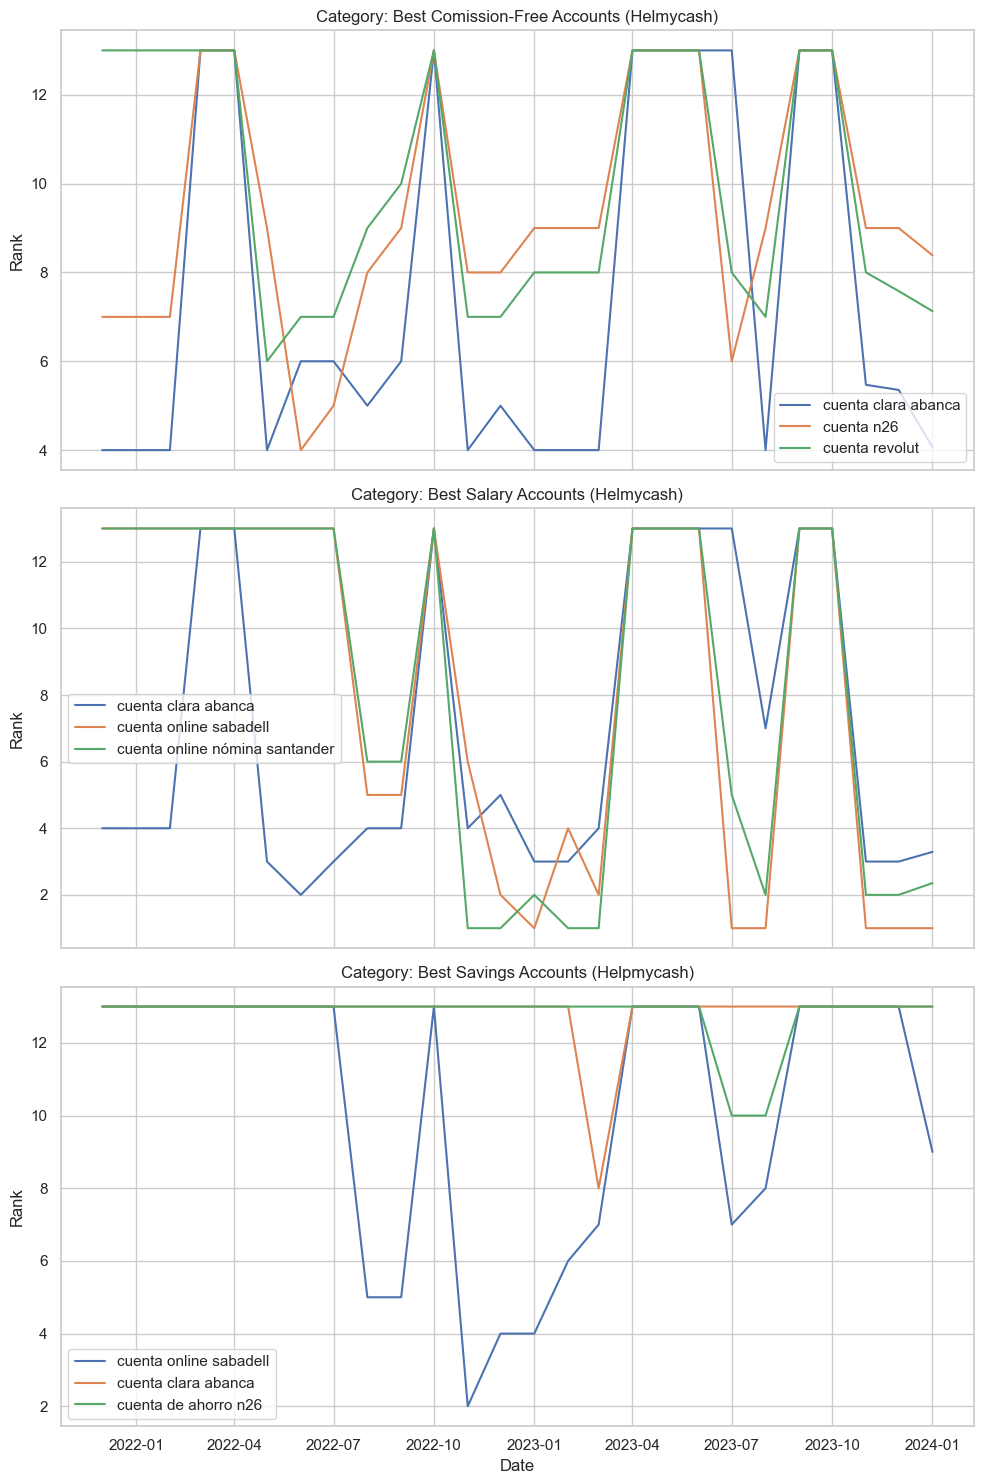

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_category_rank(df):
    # Set the style
    sns.set(style="whitegrid")

    # Unique categories
    categories = df['Category'].unique()

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=len(categories), figsize=(10, 5 * len(categories)), sharex=True)

    # Loop through categories and create a plot for each
    for i, category in enumerate(categories):
        # Filter the DataFrame for the current category
        category_df = df[df['Category'] == category]
        
        # Plot each product over time
        for product in category_df['account product'].unique():
            ax = sns.lineplot(data=category_df[category_df['account product'] == product], x='Date', y='Rank', label=product, ax=axes[i])
        
        # Set plot titles and labels
        axes[i].set_title(f'Category: {category}')
        axes[i].set_ylabel('Rank')
        axes[i].set_xlabel('Date')

    # Adjust layout
    plt.tight_layout()
    plt.show()

plot_category_rank(df = cleaned_df)


### We observed the rank that mapped with account product. Only Commision-Free and Salary rank is siutable to expand more explanatry analysis, as they have almost full period and lower value that close to 13. Which 13 means not included with rank

In [229]:
from statsmodels.tsa.seasonal import seasonal_decompose

The additive model of time series decomposition can be expressed as follows:

$$ Y_t = T_t + S_t + R_t $$

Where:
- \( Y_t \) is the observed data at time \( t \).
- \( T_t \) is the trend component at time \( t \).
- \( S_t \) is the seasonal component at time \( t \).
- \( R_t \) is the residual (or irregular) component at time \( t \).
</br>
- Model options: Additive, Multiplicative.
</br>
</br>
Trend: Calculated using a polynomial equation of each lag t. If the series is short or the seasonality is strong, the trend might not be well estimated.</br>
Seasonal: The average for each time unit (e.g., each month) is subtracted (additive) or divided (multiplicative) to remove the trend. This average is calculated by taking the mean of all data points that belong to the same season.</br>
Residual: The residual is what remains after the trend and seasonal components have been removed from the original data.</br>


In [230]:
specific_category_df = cleaned_df[(cleaned_df['Category'] == 'Best Comission-Free Accounts (Helmycash)') | 
                                  (cleaned_df['Category'] == 'Best Salary Accounts (Helmycash)')]

import pandas as pd

# Drop unnecessary columns
specific_category_df = specific_category_df.drop(columns=['Unnamed: 0', 'bank', 'url - bank product information'])

# Convert 'Date' to datetime if it hasn't been converted, and set it as the index
specific_category_df['Date'] = pd.to_datetime(specific_category_df['Date'])
specific_category_df.set_index('Date', inplace=True)

# Ensure that 'Rank' is a float (it should already be based on your dtype info)
specific_category_df['Rank'] = pd.to_numeric(specific_category_df['Rank'], errors='coerce')

# Drop any rows that have NaN values in critical columns if necessary
specific_category_df.dropna(subset=['Rank', 'Bank Name', 'Category'], inplace=True)


### Inverse Rank- in order to catch better understanding of rank

In [231]:
rank_max = specific_category_df['Rank'].max()
specific_category_df['Inverse Rank'] = rank_max - specific_category_df['Rank'] + 1

In [232]:
specific_category_df.head(5)

Category               Bank Name  \
Date                                                                           
2021-12-01  Best Comission-Free Accounts (Helmycash)     cuenta clara abanca   
2021-12-01  Best Comission-Free Accounts (Helmycash)              cuenta n26   
2021-12-01  Best Comission-Free Accounts (Helmycash)          cuenta revolut   
2021-12-01          Best Salary Accounts (Helmycash)     cuenta clara abanca   
2021-12-01          Best Salary Accounts (Helmycash)  cuenta online sabadell   

            Rank         account product  Inverse Rank  
Date                                                    
2021-12-01   4.0     cuenta clara abanca          10.0  
2021-12-01   7.0              cuenta n26           7.0  
2021-12-01  13.0          cuenta revolut           1.0  
2021-12-01   4.0     cuenta clara abanca          10.0  
2021-12-01  13.0  cuenta online sabadell           1.0

In [233]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd

def decompose_and_analyze_seasonality(group, target_column = 'Rank', model_type = 'additive'):
    # Check for sufficient data points
    if group[target_column].dropna().shape[0] < 2:
        print(f"Not enough data to decompose for {group.name}")
        return group

    # Handle missing values appropriately
    #group[target_column] = group[target_column].fillna(method='ffill').fillna(method='bfill')
    
    
    # Ensure data frequency is set correctly to monthly
    if not pd.infer_freq(group.index):
        group = group.asfreq('M')

    # Perform seasonal decomposition
    try:
        # period of 12 for monthly data (yearly seasonality)
        result = seasonal_decompose(group[target_column], model=model_type, period=12)
        result.plot()
        plt.title(f"Decomposition for Bank: {group.name[0]}, Category: {group.name[1]}")
        plt.tight_layout()
        plt.show()
        
        analyze_seasonal_component(result.seasonal, group.name)
        #analyze_error_component(result.resid, group.name)

        return result.seasonal
    except ValueError as e:
        print(f"Decomposition failed for {group.name} with error: {e}")


def analyze_seasonal_component(seasonal_series, name):
    # Group by month to see the average seasonal effect per month
    monthly_seasonal_effect = seasonal_series.groupby(seasonal_series.index.month).mean()
    monthly_seasonal_effect.plot(kind='bar')
    plt.title(f"Average Monthly Seasonal Effects for {name[0]}, {name[1]}")
    plt.xlabel('Month')
    plt.ylabel('Seasonal Effect')
    plt.show()
    
def analyze_error_component(residuals, name):
    if residuals.isnull().any():
        residuals = residuals.dropna()  # Ensure there are no NaNs

    # Plotting the ACF and PACF
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
    
    plot_acf(residuals, lags=40, ax=ax1)
    ax1.set_title(f'Autocorrelation Function for {name[0]}, {name[1]}')

    plot_pacf(residuals, lags=40, ax=ax2)
    ax2.set_title(f'Partial Autocorrelation Function for {name[0]}, {name[1]}')
    
    plt.tight_layout()
    plt.show()

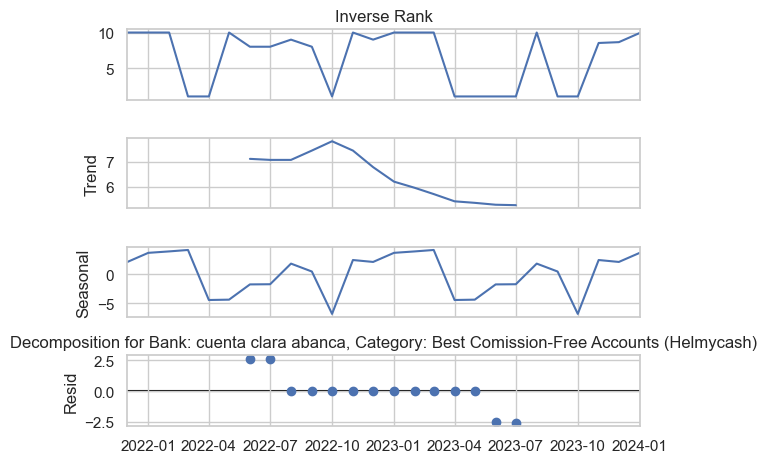

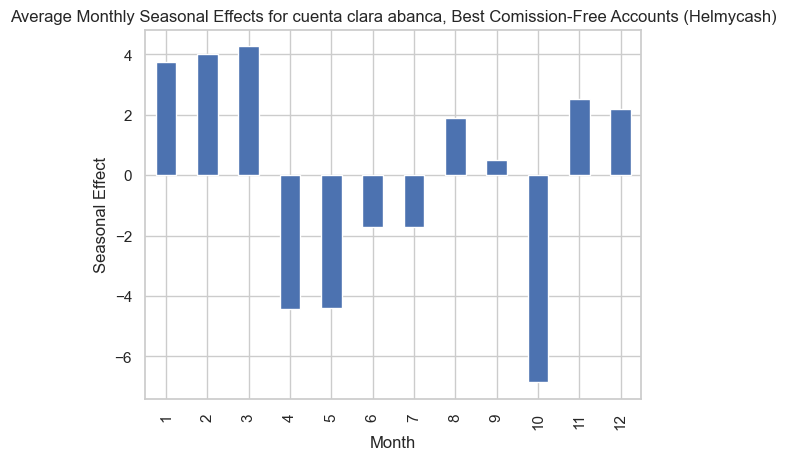

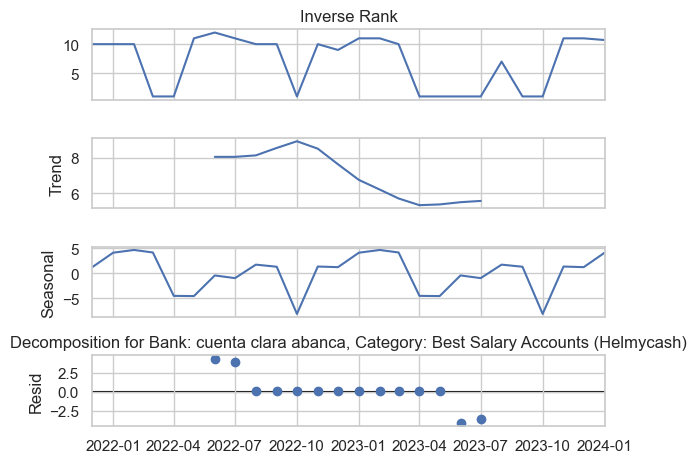

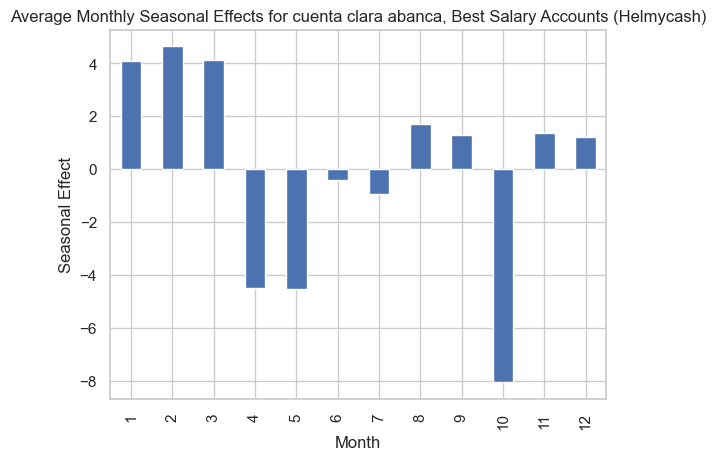

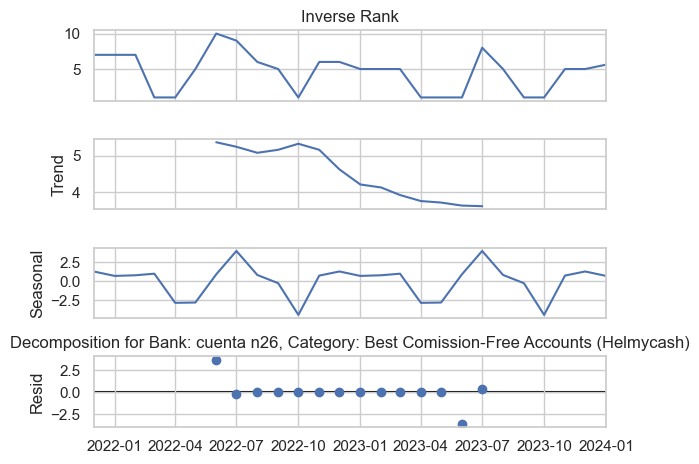

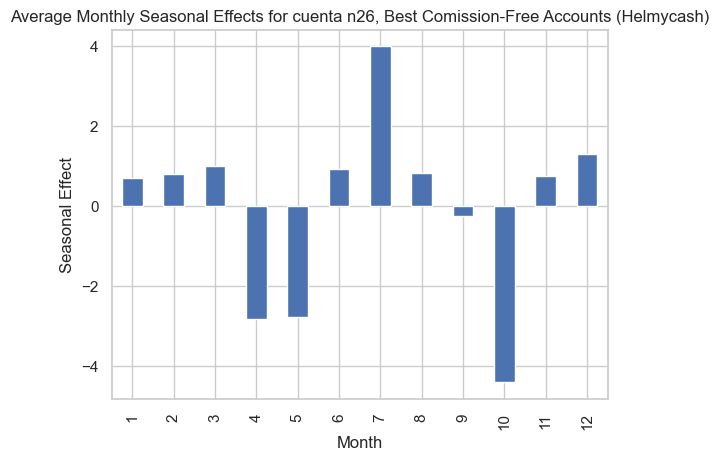

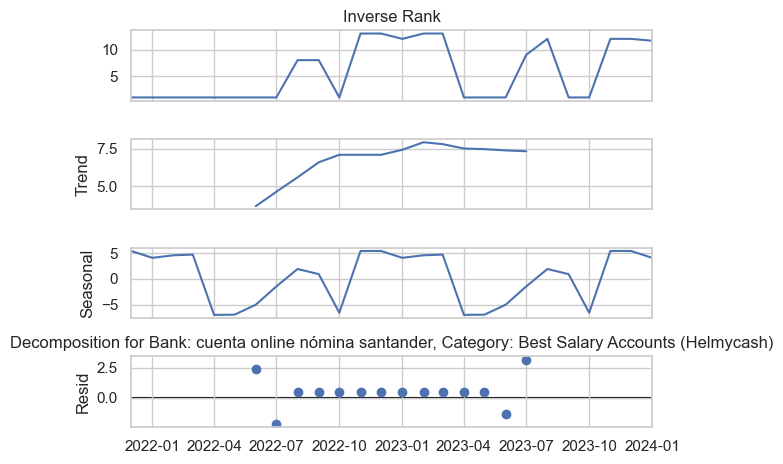

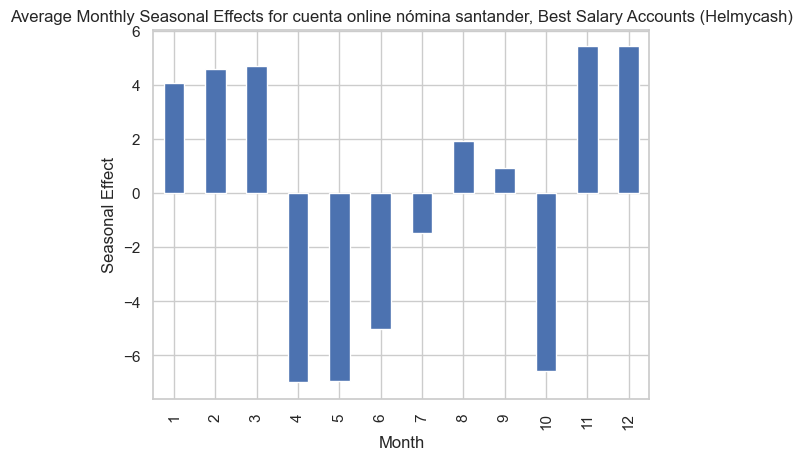

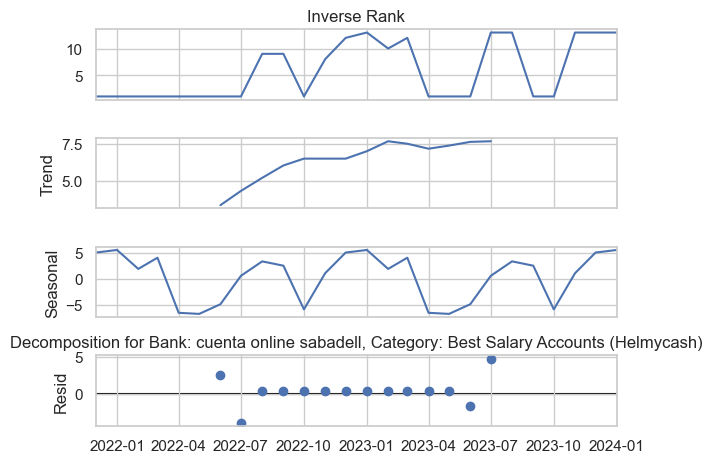

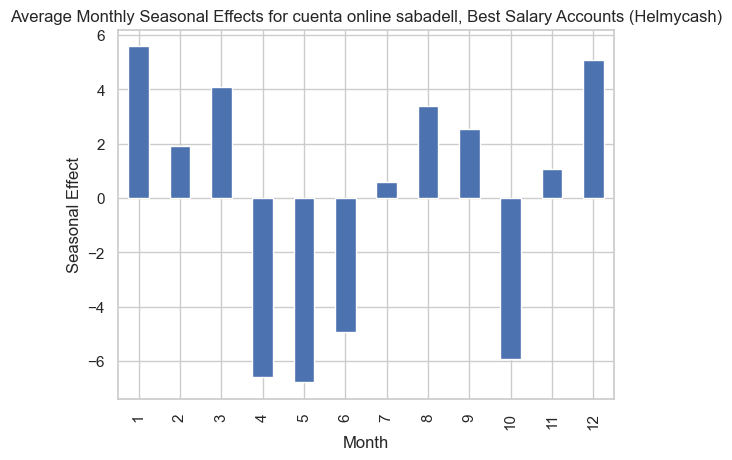

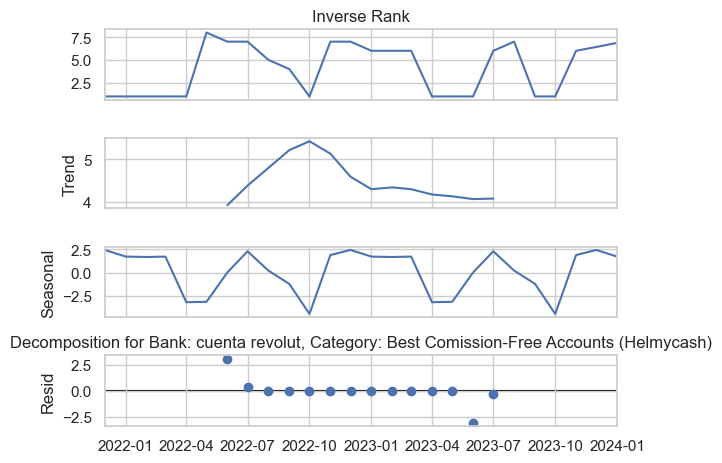

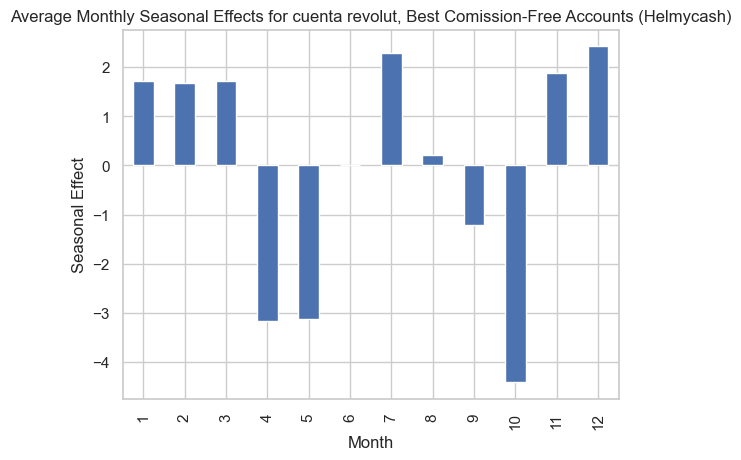

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_21228\15388047.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  seasonal_effects = specific_category_df.groupby(['Bank Name', 'Category']).apply(


In [234]:
seasonal_effects = specific_category_df.groupby(['Bank Name', 'Category']).apply(
    lambda group: decompose_and_analyze_seasonality(group, 'Inverse Rank', 'additive'))


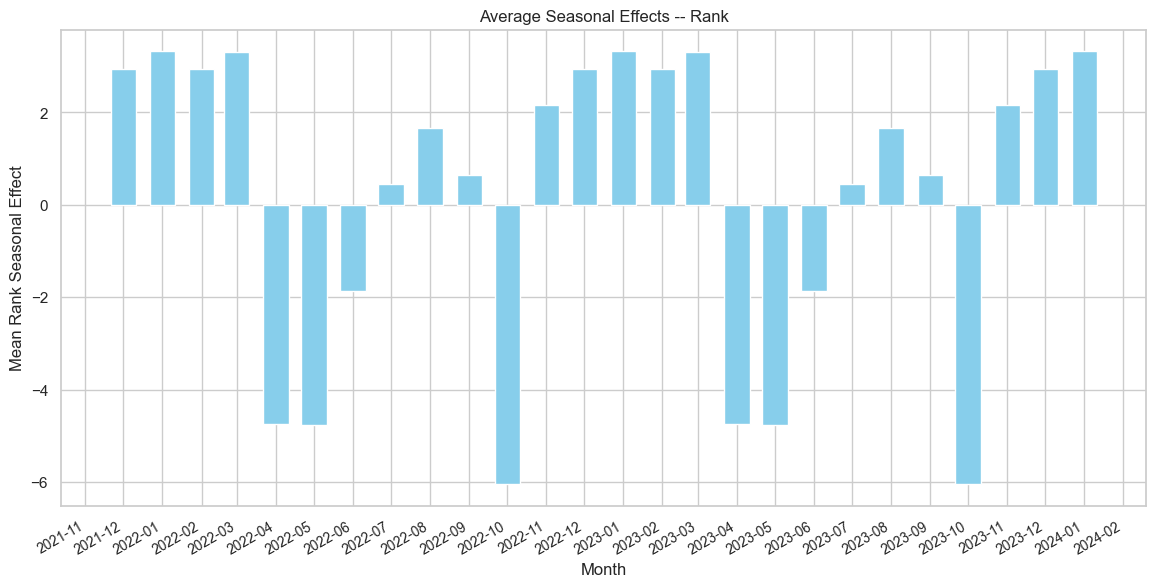

In [235]:
#print(seasonal_effects)
# Drop None values which represent groups with insufficient data
seasonal_effects = seasonal_effects.dropna()
monthly_mean_seasonal_effects = seasonal_effects.mean(axis=0)

import matplotlib.dates as mdates

plt.figure(figsize=(14, 7))  # Adjusting figure size for clarity
plt.bar(monthly_mean_seasonal_effects.index, monthly_mean_seasonal_effects.values, color='skyblue', width=20)

# Setting up date formatting on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate ticks at each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format ticks as Year-Month

# Auto-rotate for x-axis labels and set font size for readability
plt.gcf().autofmt_xdate()
plt.tick_params(axis='x', labelsize=10)

# Setting labels and title
plt.title('Average Seasonal Effects -- Rank')
plt.xlabel('Month')
plt.ylabel('Mean Rank Seasonal Effect')

plt.show()

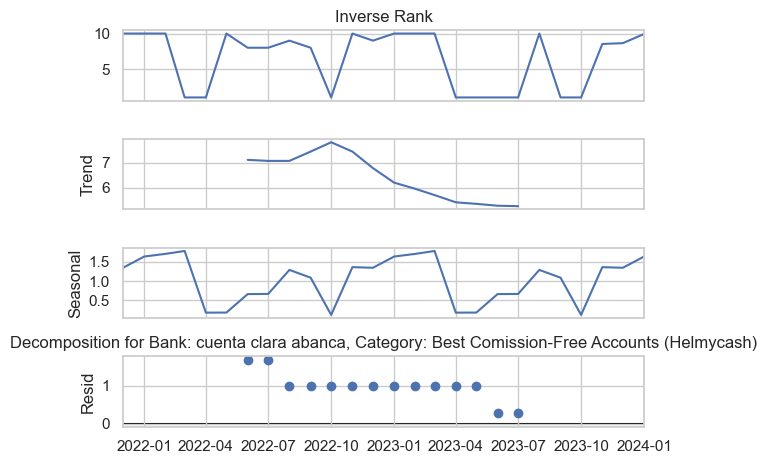

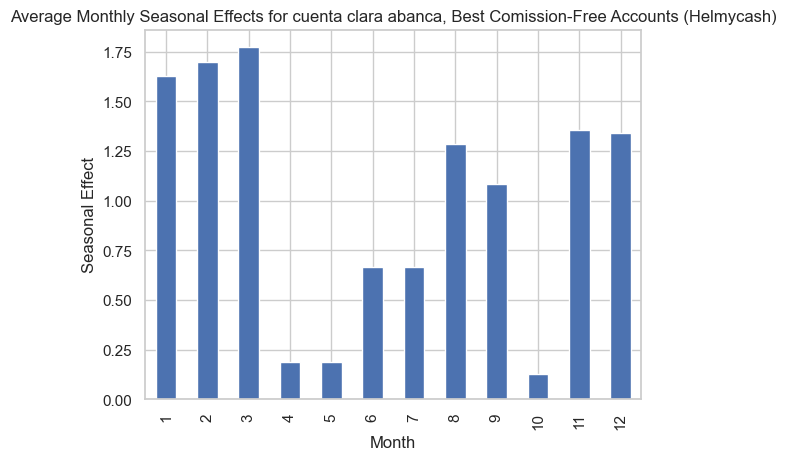

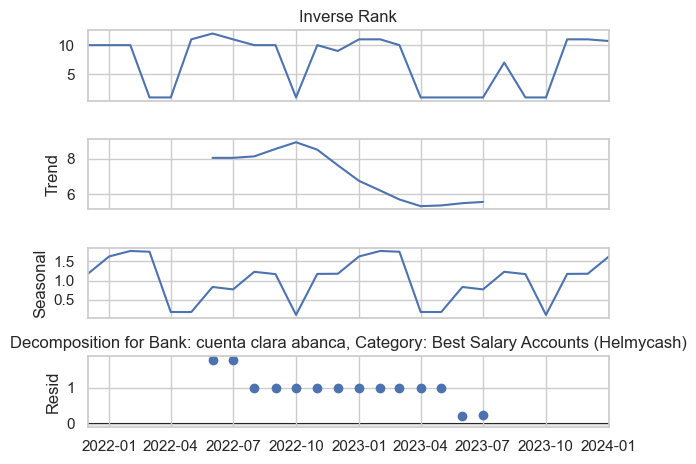

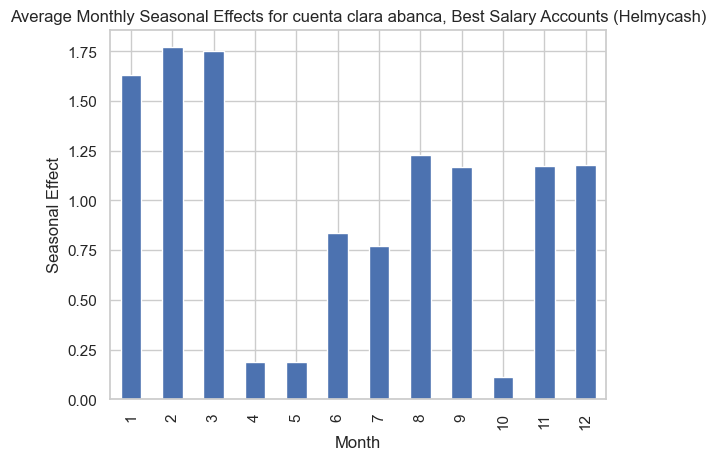

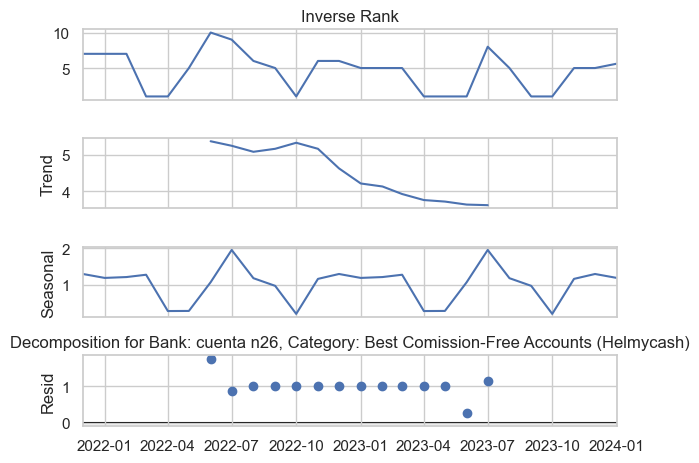

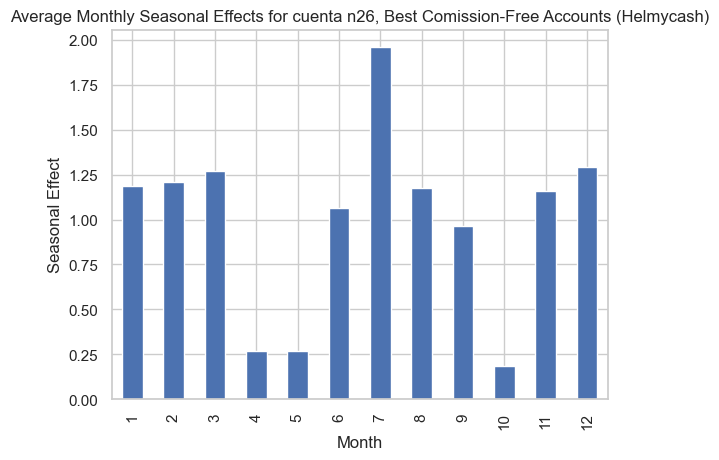

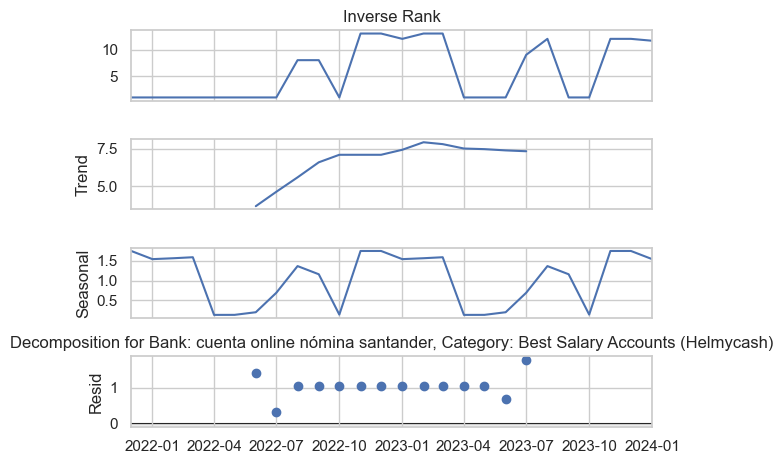

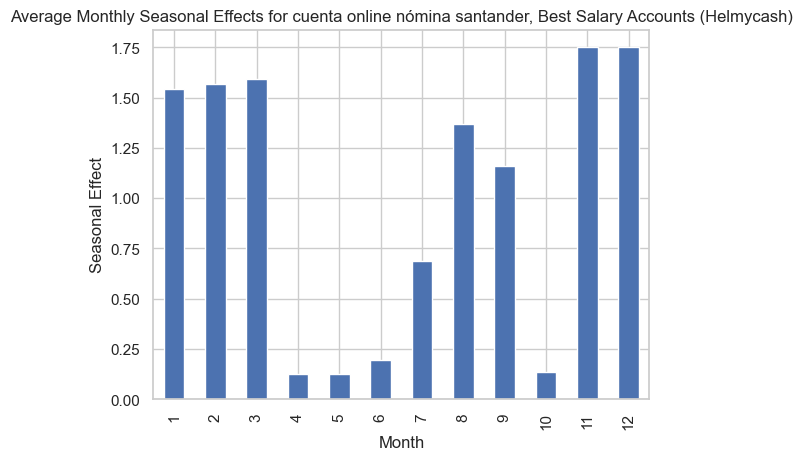

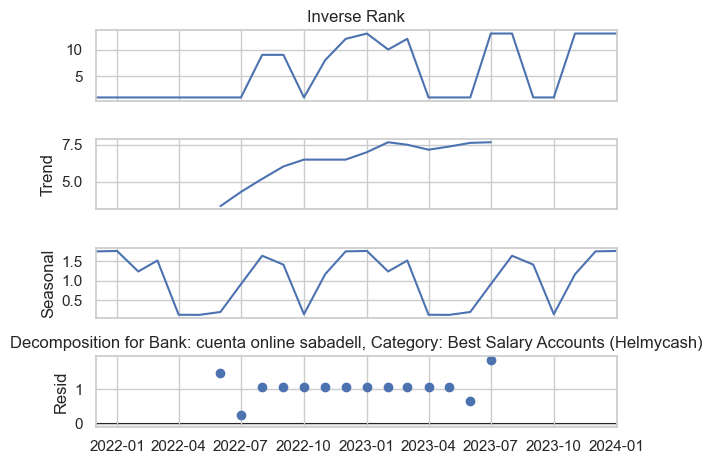

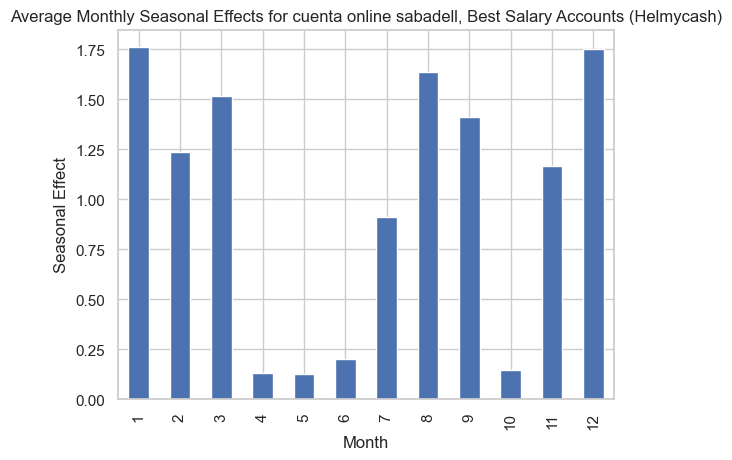

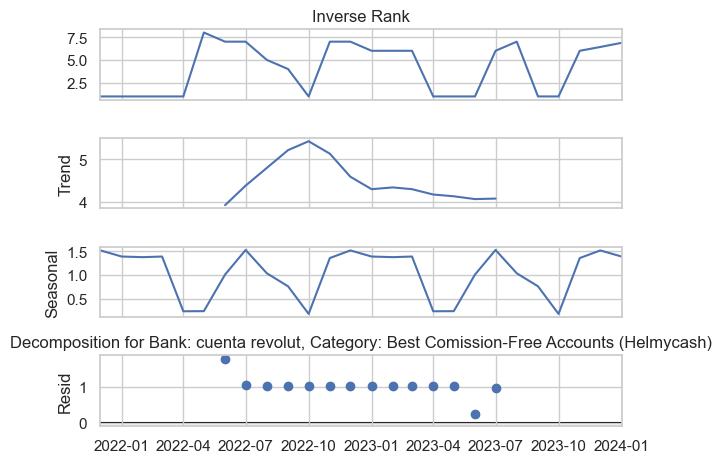

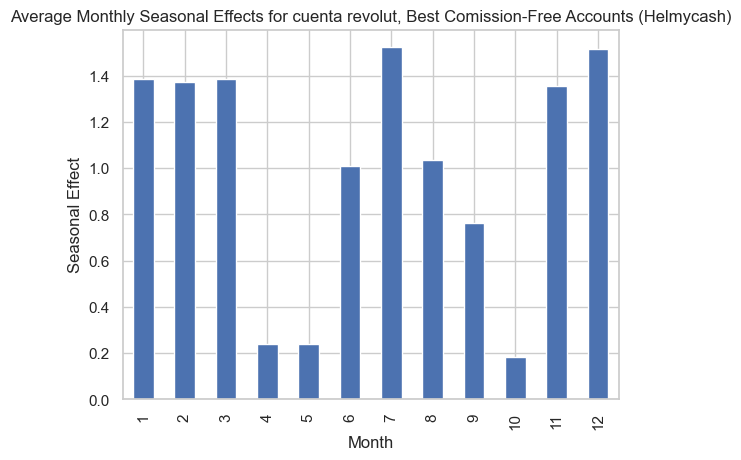

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_21228\1042659182.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  seasonal_effects = specific_category_df.groupby(['Bank Name', 'Category']).apply(lambda group: decompose_and_analyze_seasonality(group, 'Inverse Rank', 'multiplicative'))


In [236]:
seasonal_effects = specific_category_df.groupby(['Bank Name', 'Category']).apply(lambda group: decompose_and_analyze_seasonality(group, 'Inverse Rank', 'multiplicative'))

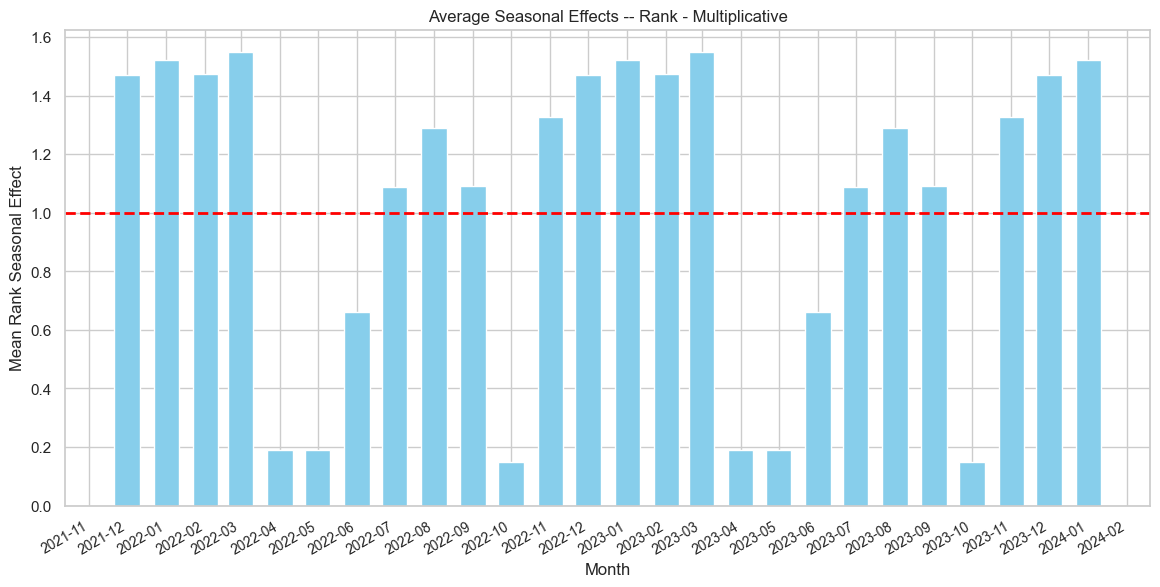

In [237]:
#print(seasonal_effects)
# Drop None values which represent groups with insufficient data
seasonal_effects = seasonal_effects.dropna()
monthly_mean_seasonal_effects = seasonal_effects.mean(axis=0)

import matplotlib.dates as mdates

plt.figure(figsize=(14, 7))  # Adjusting figure size for clarity
plt.bar(monthly_mean_seasonal_effects.index, monthly_mean_seasonal_effects.values, color='skyblue', width=20)

# Setting up date formatting on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate ticks at each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format ticks as Year-Month

plt.axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='Threshold @ 1.0') # Threshold

# Auto-rotate for x-axis labels and set font size for readability
plt.gcf().autofmt_xdate()
plt.tick_params(axis='x', labelsize=10)

# Setting labels and title
plt.title('Average Seasonal Effects -- Rank - Multiplicative')
plt.xlabel('Month')
plt.ylabel('Mean Rank Seasonal Effect')

plt.show()

### In rank seasonal effect
For the same bank account, We saw a same seasonal effect winth each category, comission-free and salary category.

Across all banks, its obviously that March and October have obviously negative seasonal effect, where negative means increasing in rank-specification. Another possible months are june and August.

Feburary, April and November show a decreasing trends.



In [238]:
# Check for duplicate entries for each bank and category per month
if cleaned_df.duplicated(subset=['account product', 'Category']).any():
    print("There are duplicates that need attention.")
else:
    print("No duplicates. Safe to proceed.")

There are duplicates that need attention.


In [239]:
import pandas as pd

# Load your data
# df = pd.read_csv('your_file.csv')

# Check for duplicate entries based on Date, Bank Name, and Category
duplicates = cleaned_df[cleaned_df.duplicated(subset=['Date', 'Bank Name', 'Category'], keep=False)]

# Display the duplicates to manually inspect what differs
print(duplicates.sort_values(by=['Date', 'Bank Name', 'Category']))


Empty DataFrame
Columns: [Category, Bank Name, Date, Rank, Unnamed: 0, account product, bank, url - bank product information]
Index: []


In [240]:
# Drop exact duplicates
cleaned_df = cleaned_df.drop_duplicates(subset=['Date', 'Bank Name', 'Category'], keep='first')

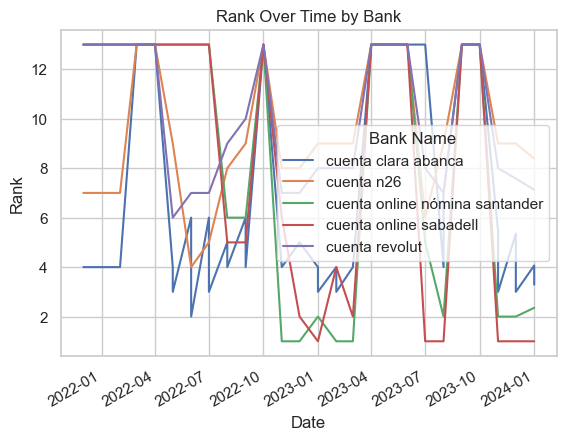

In [241]:
specific_category_df.groupby('account product')['Rank'].plot(legend=True)
plt.title('Rank Over Time by Bank')
plt.ylabel('Rank')
plt.xlabel('Date')
plt.legend(title='Bank Name')
plt.show()


In [242]:

cleaned_df.rename(columns={'url - bank product information' : 'URL'}, inplace=True)

file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/Account Products.xlsx'
web_traffic_df = pd.read_excel(file_path, sheet_name='web_traffic_accounts')
web_traffic_df.head(5)


Date  abanca.com/es/cuentas/cuenta-online  \
0 2021-12-01                         15202.983835   
1 2022-01-01                         42183.913207   
2 2022-02-01                         34498.153115   
3 2022-03-01                         34546.319021   
4 2022-04-01                         40508.288420   

   n26.com/es-es/cuenta-sin-comisiones  bancsabadell.com/cuenta-online  \
0                          6664.368911                             NaN   
1                          5310.177360                             NaN   
2                          5547.588971                             NaN   
3                          4900.271300                             NaN   
4                          4909.581023                             NaN   

   ing.es/cuenta-nocuenta-ing  \
0                         NaN   
1                         NaN   
2                         NaN   
3                         NaN   
4                         NaN   

   bbva.es/personas/productos/cuentas/cuenta-online-sin-comisiones.html  \
0                                                          45449.486787   
1                                                          38306.464983   
2                                                          40978.325821   
3                                                          43970.545627   
4                                                          40782.451956   

   revolut.com/es-ES/a-radically-better-account/  \
0                                    1343.418328   
1                                    1531.016801   
2                                    1304.591257   
3                                    1105.180575   
4                                    1020.968713   

   openbank.es/cuenta-ahorro-bienvenida  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   myinvestor.es/cuentas-tarjetas/cuentas  n26.com/es-es/cuenta-ahorro  \
0                             5319.608623                          NaN   
1                             6577.851993                          NaN   
2                             4031.716960                          NaN   
3                             4941.009311                          NaN   
4                             5774.734455                          NaN   

   bankinter.com/banca/cuentas-tarjetas/cuentas/cuenta-nomina  \
0                                                 8733.560835   
1                                                11410.593443   
2                                                 8891.661053   
3                                                 7446.925144   
4                                                10285.861726   

   ing.es/cuenta-nocuenta-ing.1  evobanco.com/cuenta-inteligente  \
0                           NaN                      5055.542564   
1                           NaN                      4539.012047   
2                           NaN                      6049.457905   
3                           NaN                      9826.193608   
4                           NaN                      5028.236254   

   bancosantander.es/particulares/cuentas-tarjetas/cuentas-corrientes/cuenta-online-sin-comisiones  
0                                                                                     22325.885971  
1                                                                                     28331.245044  
2                                                                                     23798.819170  
3                                                                                     24808.561729  
4                                                                                     24739.758729

In [243]:
web_traffic_df = web_traffic_df.reset_index(drop=True)
# Melting the DataFrame
long_web_traffic_df = web_traffic_df.melt(id_vars=['Date'], var_name='URL', value_name='Web Traffic')


# Ensure no 'index' labels incorrectly positioned
print(long_web_traffic_df.head(100))


         Date                                  URL   Web Traffic
0  2021-12-01  abanca.com/es/cuentas/cuenta-online  15202.983835
1  2022-01-01  abanca.com/es/cuentas/cuenta-online  42183.913207
2  2022-02-01  abanca.com/es/cuentas/cuenta-online  34498.153115
3  2022-03-01  abanca.com/es/cuentas/cuenta-online  34546.319021
4  2022-04-01  abanca.com/es/cuentas/cuenta-online  40508.288420
5  2022-05-01  abanca.com/es/cuentas/cuenta-online  29791.338180
6  2022-06-01  abanca.com/es/cuentas/cuenta-online  35087.423687
7  2022-07-01  abanca.com/es/cuentas/cuenta-online  61969.499304
8  2022-08-01  abanca.com/es/cuentas/cuenta-online  53939.003961
9  2022-09-01  abanca.com/es/cuentas/cuenta-online  50991.056414
10 2022-10-01  abanca.com/es/cuentas/cuenta-online  50567.127100
11 2022-11-01  abanca.com/es/cuentas/cuenta-online  54180.810911
12 2022-12-01  abanca.com/es/cuentas/cuenta-online  68183.612577
13 2023-01-01  abanca.com/es/cuentas/cuenta-online  72370.734829
14 2023-02-01  abanca.com

In [244]:
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])
long_web_traffic_df['Date'] = pd.to_datetime(long_web_traffic_df['Date'])

web_traffic_merged_df = pd.merge(
    cleaned_df, 
    long_web_traffic_df, 
    how='left', 
    on=['Date', 'URL']
)

In [245]:
import pandas as pd


web_traffic_merged_df['Rank'] = web_traffic_merged_df['Rank'].fillna(13)

# Drop unnecessary columns
specific_category_df = web_traffic_merged_df.drop(columns=['Unnamed: 0', 'bank', 'URL'])

# Convert 'Date' to datetime if it hasn't been converted, and set it as the index
specific_category_df['Date'] = pd.to_datetime(specific_category_df['Date'])
specific_category_df.set_index('Date', inplace=True)

# Ensure that 'Rank' is a float (it should already be based on your dtype info)
specific_category_df['Rank'] = pd.to_numeric(specific_category_df['Rank'], errors='coerce')
rank_max = specific_category_df['Rank'].max()
specific_category_df['Inverse Rank'] = rank_max - specific_category_df['Rank'] + 1

# Drop any rows that have NaN values in critical columns if necessary
specific_category_df.dropna(subset=['Rank', 'Inverse Rank', 'Bank Name', 'Category'], inplace=True)

specific_category_df.head(10)


Category  \
Date                                                   
2021-12-01  Best Comission-Free Accounts (Helmycash)   
2021-12-01  Best Comission-Free Accounts (Helmycash)   
2021-12-01  Best Comission-Free Accounts (Helmycash)   
2021-12-01          Best Salary Accounts (Helmycash)   
2021-12-01          Best Salary Accounts (Helmycash)   
2021-12-01          Best Salary Accounts (Helmycash)   
2021-12-01        Best Savings Accounts (Helpmycash)   
2021-12-01        Best Savings Accounts (Helpmycash)   
2021-12-01        Best Savings Accounts (Helpmycash)   
2022-01-01  Best Comission-Free Accounts (Helmycash)   

                                 Bank Name  Rank  \
Date                                               
2021-12-01             cuenta clara abanca   4.0   
2021-12-01                      cuenta n26   7.0   
2021-12-01                  cuenta revolut  13.0   
2021-12-01             cuenta clara abanca   4.0   
2021-12-01          cuenta online sabadell  13.0   
2021-12-01  cuenta online nómina santander  13.0   
2021-12-01          cuenta online sabadell  13.0   
2021-12-01             cuenta clara abanca  13.0   
2021-12-01            cuenta de ahorro n26  13.0   
2022-01-01             cuenta clara abanca   4.0   

                           account product   Web Traffic  Inverse Rank  
Date                                                                    
2021-12-01             cuenta clara abanca  15202.983835          10.0  
2021-12-01                      cuenta n26   6664.368911           7.0  
2021-12-01                  cuenta revolut   1343.418328           1.0  
2021-12-01             cuenta clara abanca  15202.983835          10.0  
2021-12-01          cuenta online sabadell           NaN           1.0  
2021-12-01  cuenta online nómina santander  22325.885971           1.0  
2021-12-01          cuenta online sabadell           NaN           1.0  
2021-12-01             cuenta clara abanca  15202.983835           1.0  
2021-12-01            cuenta de ahorro n26           NaN           1.0  
2022-01-01             cuenta clara abanca  42183.913207          10.0

In [246]:
grouped = specific_category_df.groupby(['Bank Name', 'Category'])

# Function to detect missing values in 'Web Traffic'
def find_missing_values(group):
    return group['Web Traffic'].isnull().sum()

# Apply the function to each group
missing_values = grouped.apply(find_missing_values)
print(missing_values)

Bank Name                       Category                                
cuenta clara abanca             Best Comission-Free Accounts (Helmycash)     1
                                Best Salary Accounts (Helmycash)             1
                                Best Savings Accounts (Helpmycash)           1
cuenta de ahorro n26            Best Savings Accounts (Helpmycash)          18
cuenta n26                      Best Comission-Free Accounts (Helmycash)     1
cuenta online nómina santander  Best Salary Accounts (Helmycash)             1
cuenta online sabadell          Best Salary Accounts (Helmycash)             6
                                Best Savings Accounts (Helpmycash)           6
cuenta revolut                  Best Comission-Free Accounts (Helmycash)     1
dtype: int64


C:\Users\wuhangze\AppData\Local\Temp\ipykernel_21228\871128594.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values = grouped.apply(find_missing_values)


In [247]:
import pandas as pd

# Set display options
pd.set_option('display.max_rows', None)  # Set to None to display all rows or set a number
pd.set_option('display.max_columns', None)  # Set to None to display all columns
pd.set_option('display.width', None)  # Use appropriate width
pd.set_option('display.max_colwidth', None)  # Display full content of each column


In [248]:
# Function to return the indices of missing values
def missing_indices(group):
    return group[group['Web Traffic'].isnull()].index

# Apply the function to each group
missing_indices = grouped.apply(missing_indices)
print(missing_indices)

Bank Name                       Category                                
cuenta clara abanca             Best Comission-Free Accounts (Helmycash)                                                                                                                                                                                                                                                                                                                            DatetimeIndex(['2024-01-01'], dtype='datetime64[ns]', name='Date', freq=None)
                                Best Salary Accounts (Helmycash)                                                                                                                                                                                                                                                                                                                                    DatetimeIndex(['2024-01-01'], dtype='datetime64[ns]', name='Date', freq=N

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_21228\476000245.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_indices = grouped.apply(missing_indices)


In [249]:
specific_category_df['Imputed Web Traffic Zero'] = specific_category_df['Web Traffic'].fillna(0)

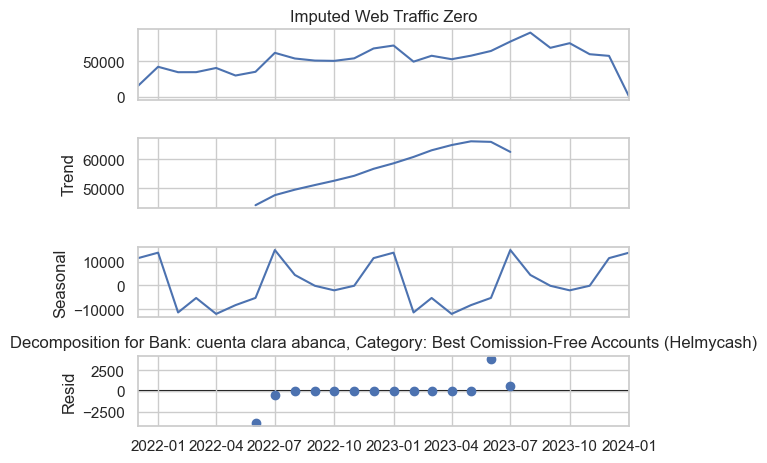

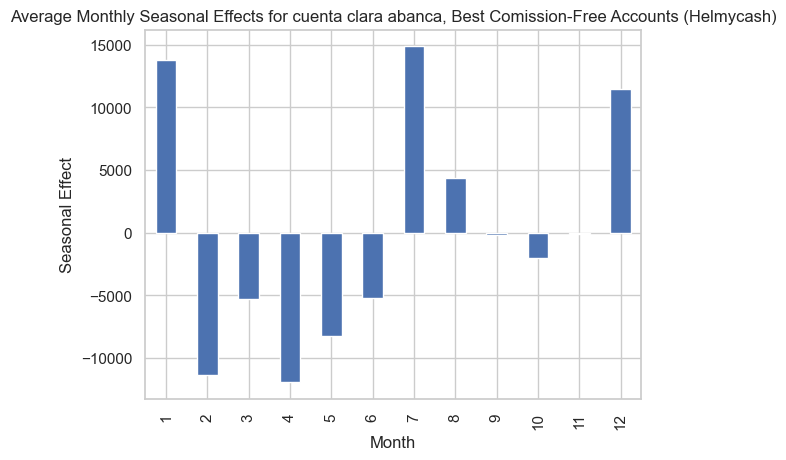

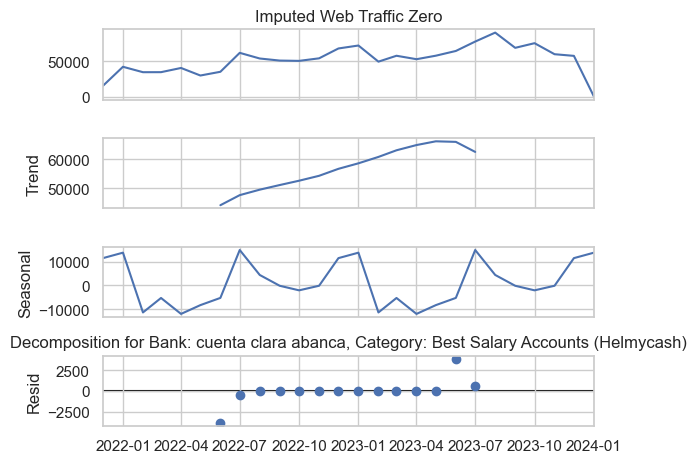

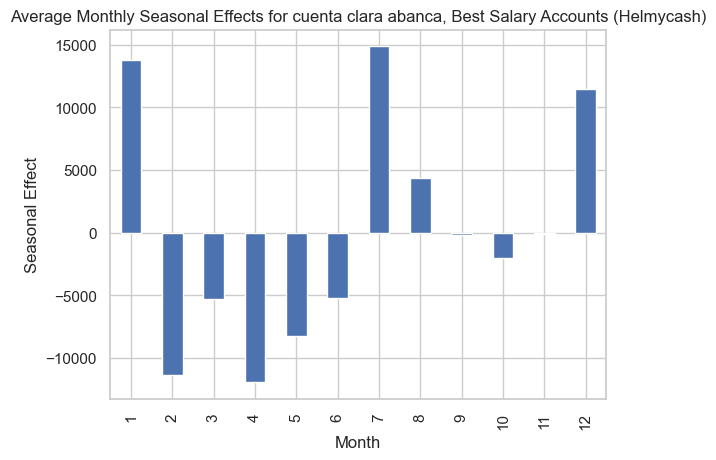

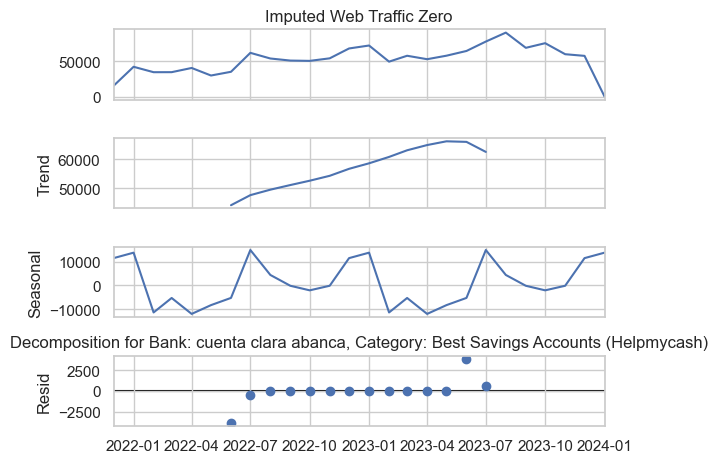

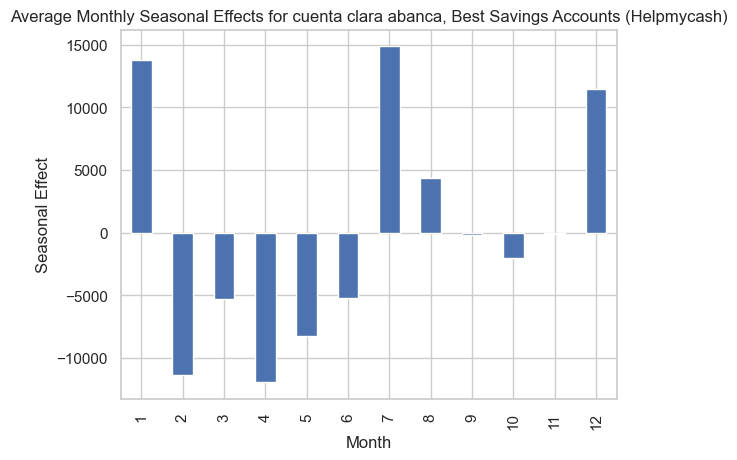

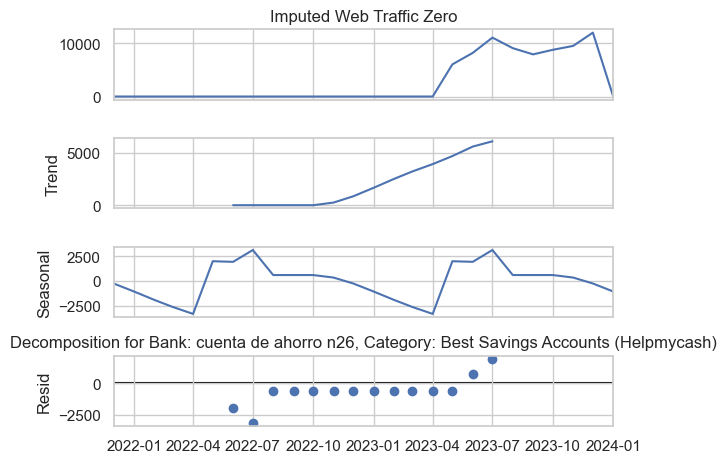

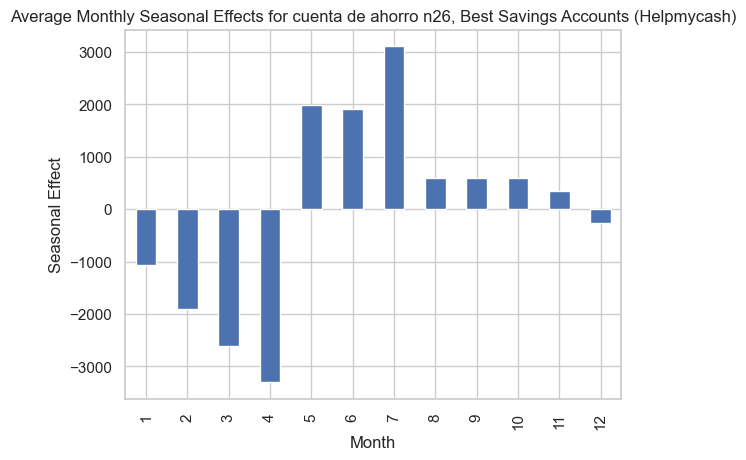

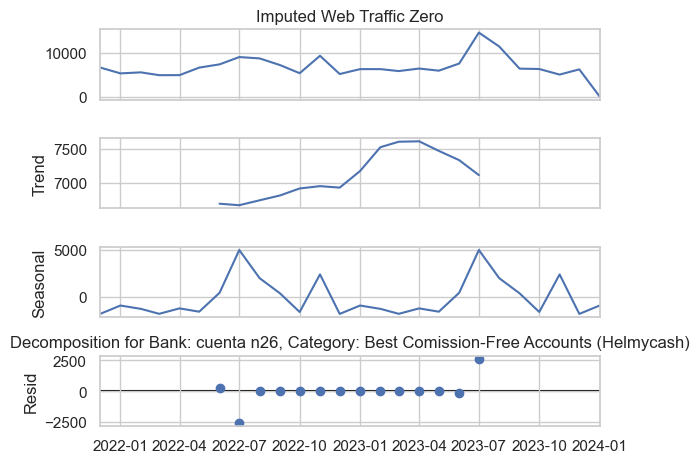

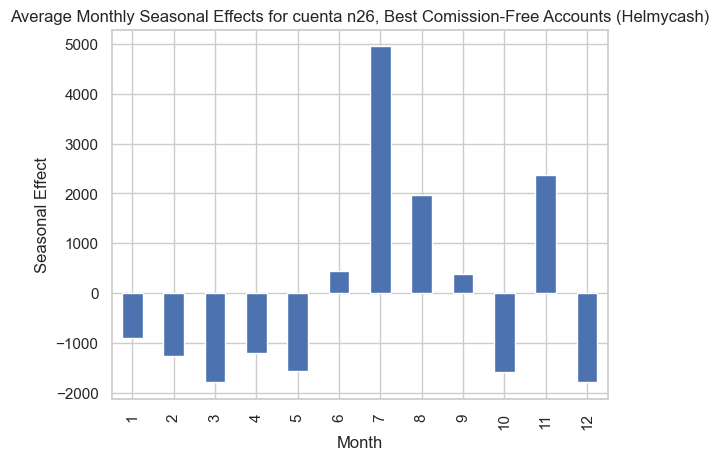

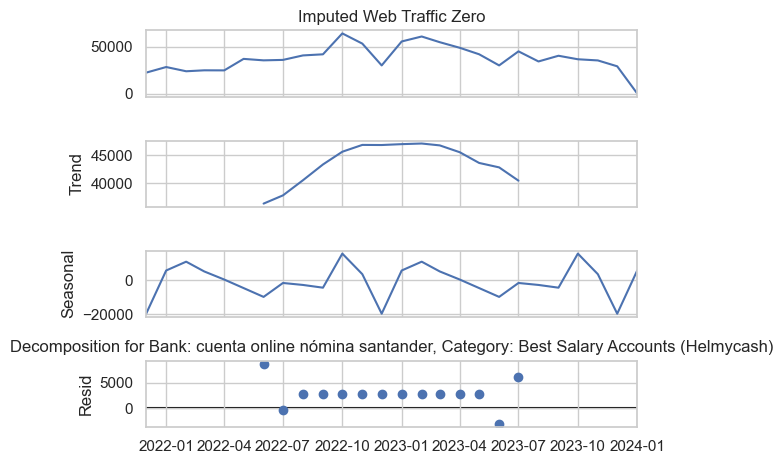

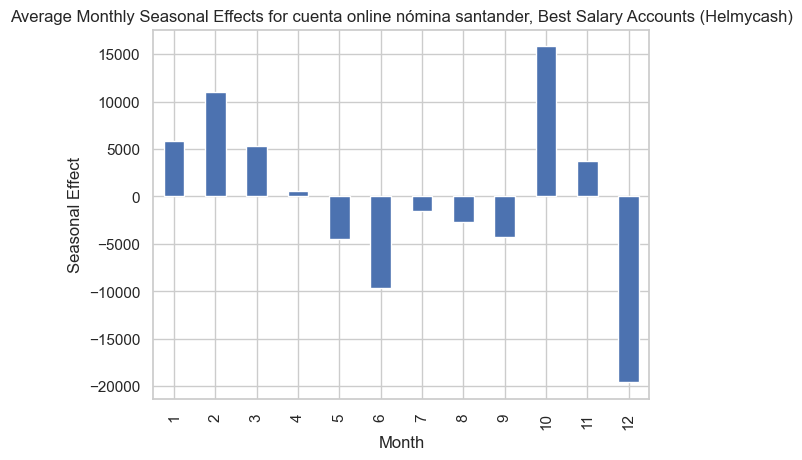

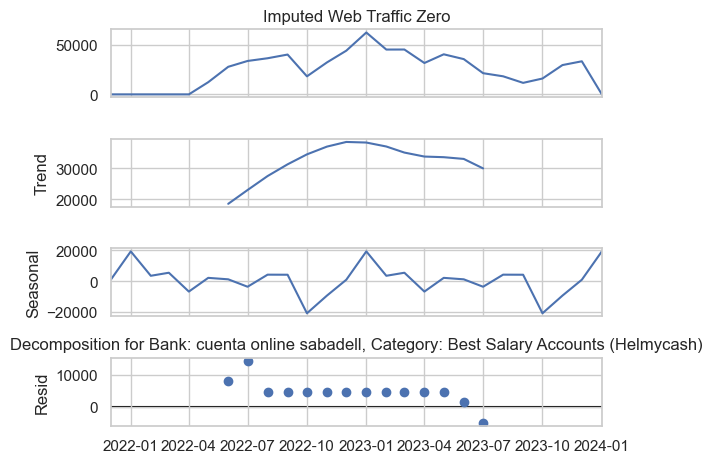

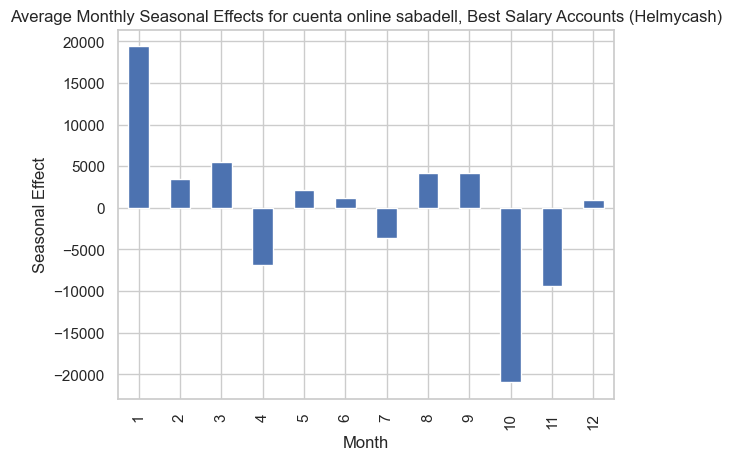

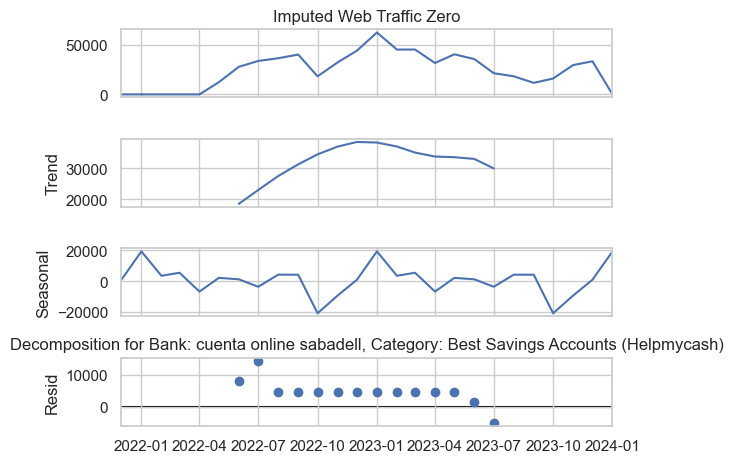

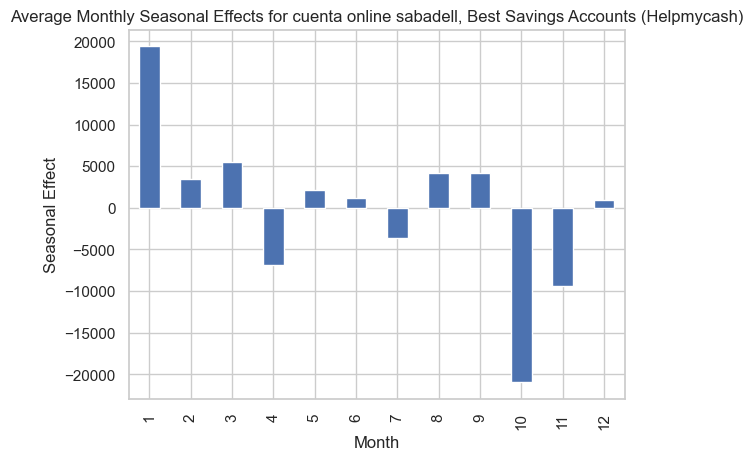

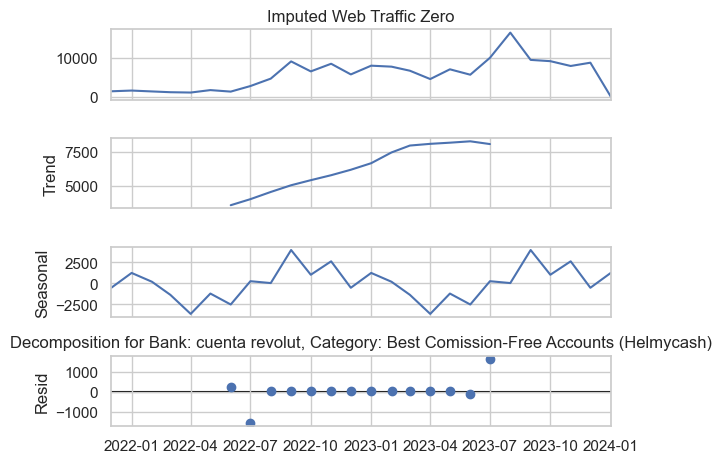

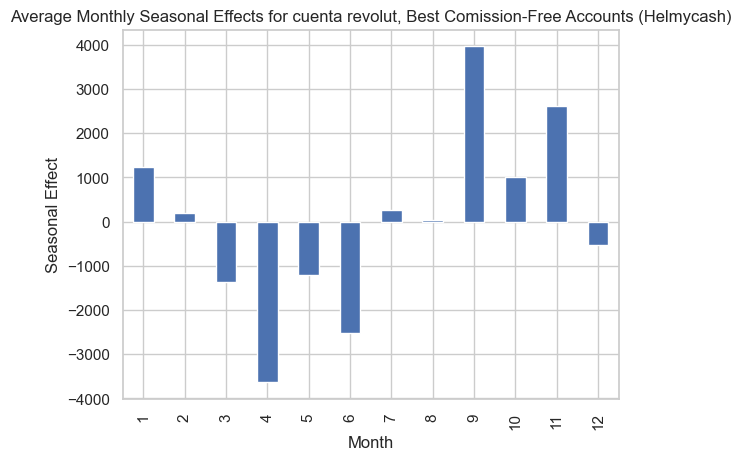

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_21228\2844326759.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  seasonal_effects = specific_category_df.groupby(['Bank Name', 'Category']).apply(lambda group: decompose_and_analyze_seasonality(group, target_column= 'Imputed Web Traffic Zero', model_type = 'additive'))


In [250]:
seasonal_effects = specific_category_df.groupby(['Bank Name', 'Category']).apply(lambda group: decompose_and_analyze_seasonality(group, target_column= 'Imputed Web Traffic Zero', model_type = 'additive'))

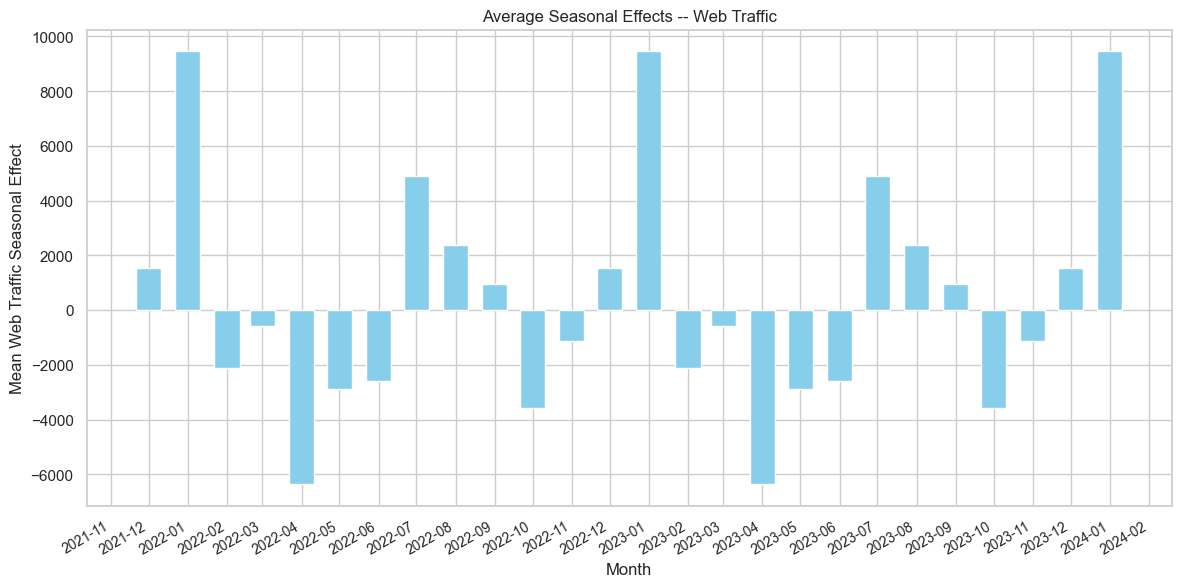

In [251]:
#print(seasonal_effects)
# Drop None values which represent groups with insufficient data
seasonal_effects = seasonal_effects.dropna()
monthly_mean_seasonal_effects = seasonal_effects.mean(axis=0)

import matplotlib.dates as mdates

plt.figure(figsize=(14, 7))  # Adjusting figure size for clarity
plt.bar(monthly_mean_seasonal_effects.index, monthly_mean_seasonal_effects.values, color='skyblue', width=20)

# Setting up date formatting on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate ticks at each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format ticks as Year-Month

# Auto-rotate for x-axis labels and set font size for readability
plt.gcf().autofmt_xdate()
plt.tick_params(axis='x', labelsize=10)

# Setting labels and title
plt.title('Average Seasonal Effects -- Web Traffic')
plt.xlabel('Month')
plt.ylabel('Mean Web Traffic Seasonal Effect')

plt.show()

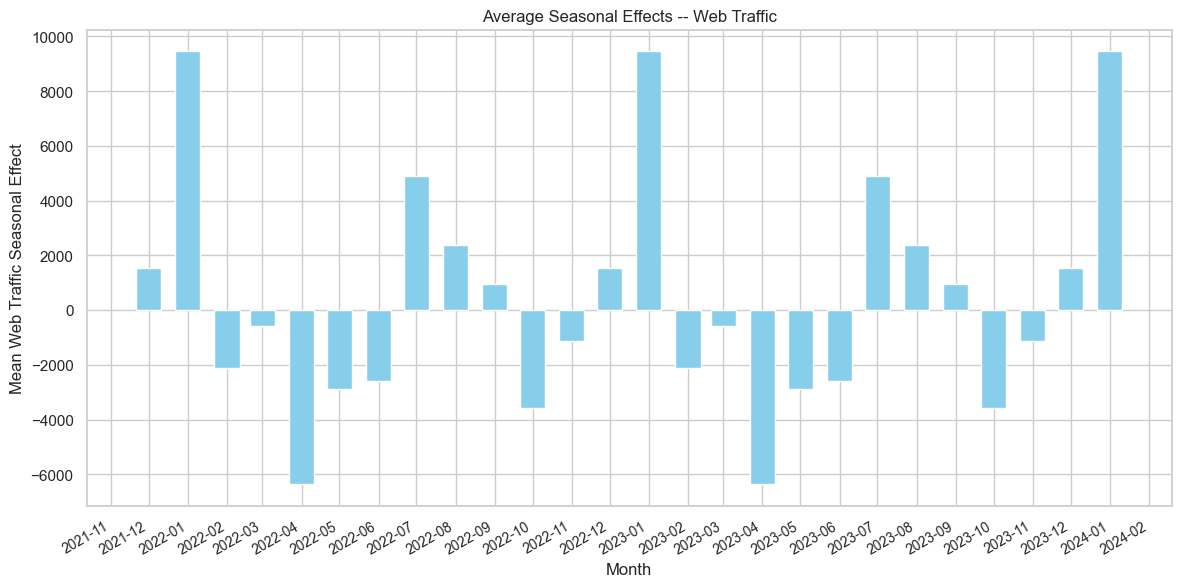

In [ ]:
#print(seasonal_effects)
# Drop None values which represent groups with insufficient data
seasonal_effects = seasonal_effects.dropna()
monthly_mean_seasonal_effects = seasonal_effects.mean(axis=0)

import matplotlib.dates as mdates

plt.figure(figsize=(14, 7))  # Adjusting figure size for clarity
plt.bar(monthly_mean_seasonal_effects.index, monthly_mean_seasonal_effects.values, color='skyblue', width=20)

# Setting up date formatting on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate ticks at each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format ticks as Year-Month

# Auto-rotate for x-axis labels and set font size for readability
plt.gcf().autofmt_xdate()
plt.tick_params(axis='x', labelsize=10)

# Setting labels and title
plt.title('Average Seasonal Effects -- Web Traffic')
plt.xlabel('Month')
plt.ylabel('Mean Web Traffic Seasonal Effect')

plt.show()

### We find that March and August has super important Negative seasonal effect cross all banks. And Feburary October show a positive seasonal effect in Web traffic

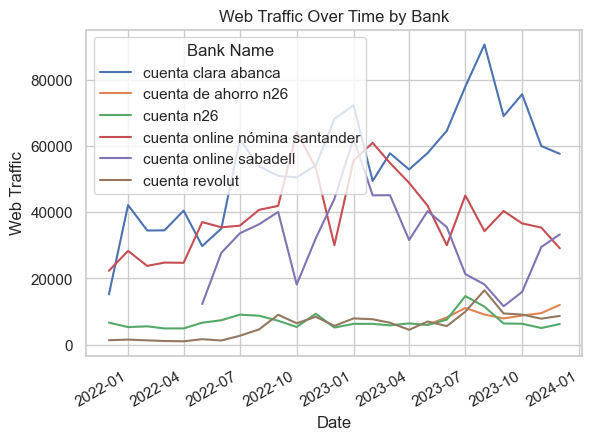

In [252]:
specific_category_df.groupby('account product')['Web Traffic'].plot(legend=True)
plt.title('Web Traffic Over Time by Bank')
plt.ylabel('Web Traffic')
plt.xlabel('Date')
plt.legend(title='Bank Name')
plt.show()

### We find that web traffic is way more variate compare to rank

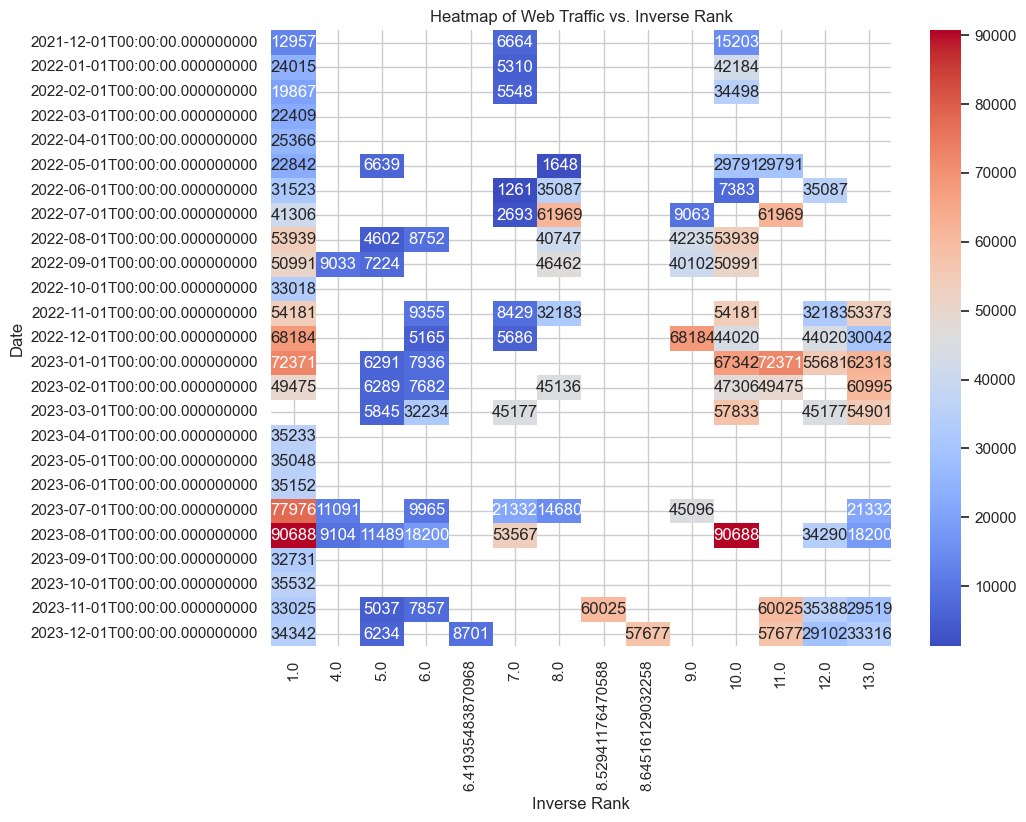

In [253]:
pivot_table = specific_category_df.pivot_table(values='Web Traffic', index='Date', columns='Inverse Rank', aggfunc='mean')

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size of the figure as needed
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm')  # 'fmt' is format of the numbers
plt.title('Heatmap of Web Traffic vs. Inverse Rank')
plt.xlabel('Inverse Rank')
plt.ylabel('Date')
plt.show()

#### This is heat map of Web Traffic and Rank in each month, we can observed that each year, there are different peak number of traffic in the same months. 2023-08 is the day has highest traffic

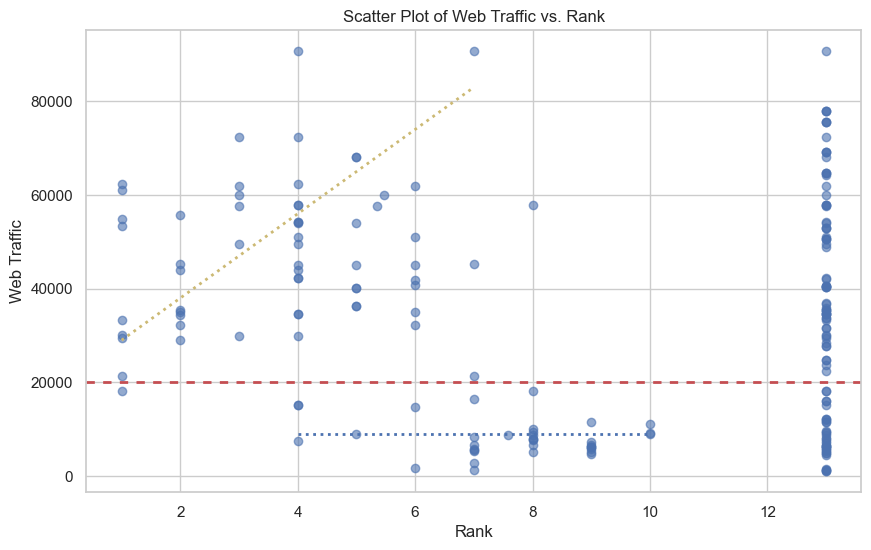

In [254]:
# Example scatter plot of Traffic vs. Rank over time
plt.figure(figsize=(10, 6))
plt.scatter(specific_category_df['Rank'], specific_category_df['Web Traffic'], alpha=0.6)

sep_line = plt.axhline(y=20000, color='r', linewidth=2, label='Separation @ 20,000')
sep_line.set_dashes([3, 3])  # 5 points on, 5 points off
# Between rank 1 and 7
# Define the slope and intercept
slope = 9000
intercept = 20000
x_values = np.array([1, 7])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, label='Positive Relation (Rank 1-6)', color='y', linewidth=2, linestyle = ':')
# Between rank 4 and 10
plt.hlines(y=9000, xmin=4, xmax=10, colors='b', linestyles='dotted', linewidth=2, label='Horizontal Relation (Rank 4-10)')

plt.title('Scatter Plot of Web Traffic vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Web Traffic')
plt.grid(True)
plt.show()


### From scatter plot, we can observed that between rank 1 and 8 here is a positive trend between web traffic and rank. whereas in between rank 4 and 10, slope is very flat.

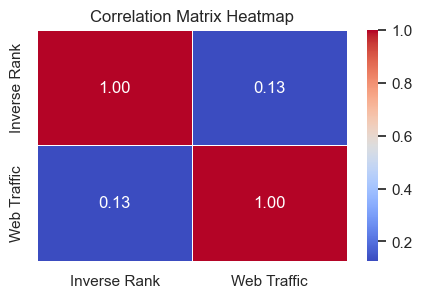

In [255]:
numerical_df = specific_category_df[['Inverse Rank', 'Web Traffic']]

corr_matrix = numerical_df.corr(method='pearson')  # Can change to 'spearman' or 'kendall'

plt.figure(figsize=(5, 3)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

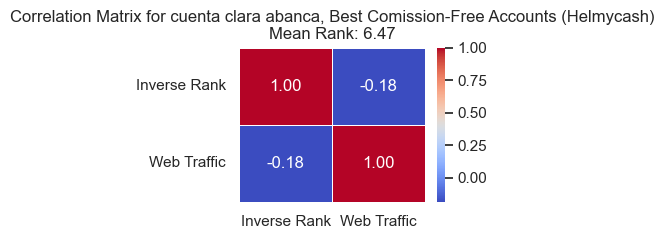

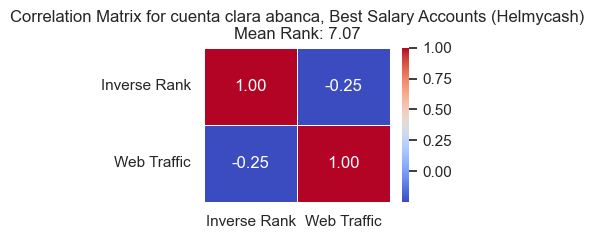

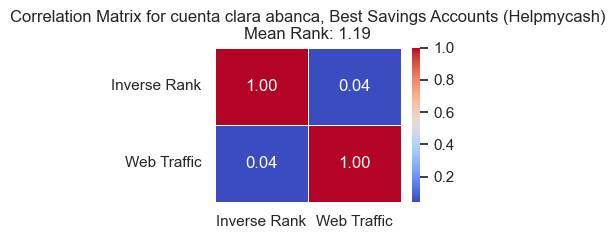

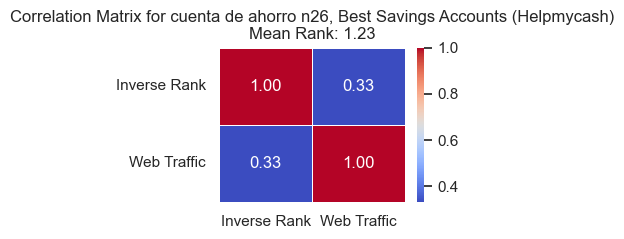

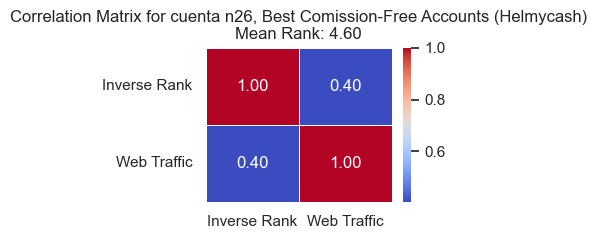

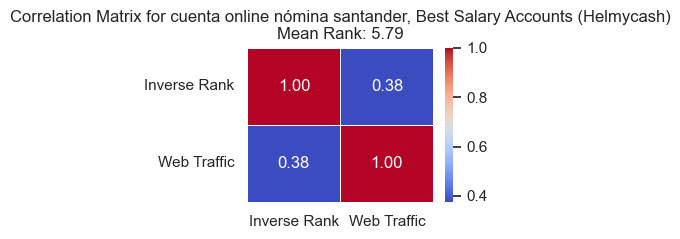

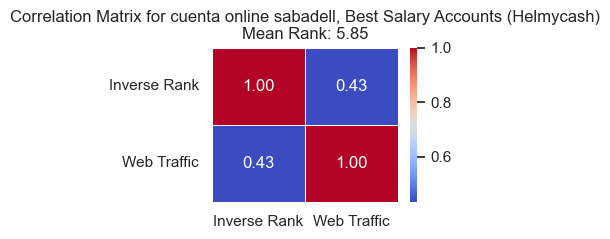

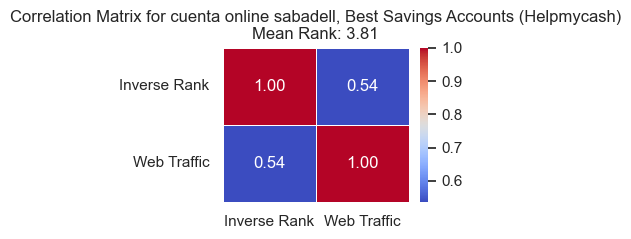

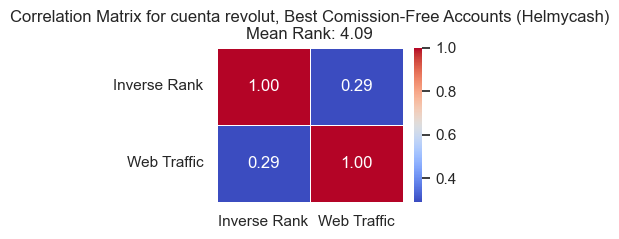

In [256]:
numerical_data = specific_category_df[['account product', 'Category', 'Inverse Rank', 'Web Traffic']]

# Group by 'account product' and 'category'
grouped = numerical_data.groupby(['account product', 'Category'])

# Iterate over each group
for (product, category), group in grouped:
    plt.figure(figsize=(3, 2))
    
    # Compute the mean of the Rank for the current group
    mean_rank = group['Inverse Rank'].mean()
    corr_matrix = group[['Inverse Rank', 'Web Traffic']].corr()  # Adjust columns as needed if more numerical columns are available
    
    # Generate a heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Matrix for {product}, {category}\nMean Rank: {mean_rank:.2f}')  # .2f for formatting to 2 decimal places
    plt.show()

#### Its all show negative relation between Rank and Web Traffic, which means the low rank value (more close to rank 1), the higher Web traffic. Whereas, bank accounts from abanco bank show both positive correlation(more far away from rank 1)